In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

# Importing Basic Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [4]:
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
test = pd.read_excel('Data_Test.xlsx')
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [6]:
# Create a new column for df value labels and assign it to a new DataFrame df1
train1 = train.copy()
train1['Train_Test_Label'] = "Train"

In [7]:
# Create test1 dataframe, a copy of Test and create a new_column for test label
test1 = test.copy()
test1['Train_Test_Label'] = "Test"

In [8]:
# Create DataFrame "df" with df and test labels
df = pd.concat([train1,test1], axis=0, ignore_index=True)

In [9]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Train_Test_Label
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Train


# Basic Statistical Analysis

## Shape and Types of Variables

In [10]:
# Shape of train and test dataset
train.shape, test.shape

((11094, 9), (2774, 8))

In [11]:
# There are 11094 rows and 2774 rows for train and test datasets respectively
# There are 12 columns (including target) and 11 columns (excluding target) for train and test datasets respectively

In [12]:
df.shape

(13868, 10)

In [13]:
# The final dataset including train and test values + the train/test labelled coluumn
print("Number of Rows:" , df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 13868
Number of Columns: 10


In [14]:
# The overall concatenated dataset (train+test) contains 13868 rows and 10 columns

In [15]:
categorical = list(df.select_dtypes(include="object").columns)
print("Categorical features:\n", categorical)
print("\n")
numerical = list(df.select_dtypes (exclude = "object").columns)
print ("Continous features:\n", numerical)

Categorical features:
 ['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Train_Test_Label']


Continous features:
 []


## Five-Point Summary

In [16]:
# For numerical data
df.describe().T

,count,unique,top,freq
Restaurant,13868,8661,ID_5538,26
Location,13868,35,"Mico Layout, Stage 2, BTM Layout,Bangalore",1158
Cuisines,13868,2392,North Indian,1076
Average_Cost,13868,26,₹200,4061
Minimum_Order,13868,20,₹50,12674
Rating,13868,33,-,1496
Votes,13868,1181,-,2616
Reviews,13868,811,-,2905
Delivery_Time,11094,7,30 minutes,7406
Train_Test_Label,13868,2,Train,11094


In [17]:
# Five-point summary

# For all features
df.describe(include="all").T

,count,unique,top,freq
Restaurant,13868,8661,ID_5538,26
Location,13868,35,"Mico Layout, Stage 2, BTM Layout,Bangalore",1158
Cuisines,13868,2392,North Indian,1076
Average_Cost,13868,26,₹200,4061
Minimum_Order,13868,20,₹50,12674
Rating,13868,33,-,1496
Votes,13868,1181,-,2616
Reviews,13868,811,-,2905
Delivery_Time,11094,7,30 minutes,7406
Train_Test_Label,13868,2,Train,11094


**Observations:**
* All the attributes are of object datatype
* We will remove 'rupee' from Average_cost and Minimum_order and convert it into integer datatype
* Rating, Votes and Reviews needs cleaning as it contains mixed values
* The target variable is Delivery time. Let us remove 'minutes' from Delivery time and convert it to integer
* We also see that for most restaurants the minimum cost/ order is Rs. 50
* Also we can say that majority of restaurants have Delivery time as 30 minutes
* Also most of the restaurant ID's mentioned are unique


## Observations for Categoric variables

In [18]:
df.dtypes

Restaurant          object
Location            object
Cuisines            object
Average_Cost        object
Minimum_Order       object
Rating              object
Votes               object
Reviews             object
Delivery_Time       object
Train_Test_Label    object
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant        13868 non-null  object
 1   Location          13868 non-null  object
 2   Cuisines          13868 non-null  object
 3   Average_Cost      13868 non-null  object
 4   Minimum_Order     13868 non-null  object
 5   Rating            13868 non-null  object
 6   Votes             13868 non-null  object
 7   Reviews           13868 non-null  object
 8   Delivery_Time     11094 non-null  object
 9   Train_Test_Label  13868 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [20]:
# we see that all hte attributes are of object datatype
# The null values in Delivery_Time can be ignored as we have concatenated train and test dataset 

In [21]:
# This gives the number of categories and % observation in each category.
for i in df.describe(include="object").columns:
    print("\n\b ",i)
    # sns.countplot(df[i])
    # plt.show()
    print(df[i].value_counts(),"\n")
    print(df[i].value_counts(normalize=True)*100)
    print("\n")


  Restaurant
ID_5538    26
ID_7184    25
ID_2483    24
ID_1209    23
ID_7295    23
ID_4654    23
ID_5321    22
ID_4625    21
ID_7750    20
ID_2301    20
ID_1140    20
ID_8511    19
ID_5708    18
ID_4906    17
ID_7564    17
ID_188     17
ID_3970    17
ID_720     16
ID_7544    16
ID_694     16
ID_3969    16
ID_2542    15
ID_6229    14
ID_2402    14
ID_7260    14
ID_5952    13
ID_4652    12
ID_5885    12
ID_7501    12
ID_686     12
ID_2794    12
ID_3116    11
ID_8606    11
ID_4446    11
ID_1657    11
ID_1015    11
ID_4562    11
ID_8495    11
ID_3203    11
ID_1635    10
ID_6163    10
ID_463     10
ID_1487    10
ID_847     10
ID_3629    10
ID_8605    10
ID_6899    10
ID_2960     9
ID_4216     9
ID_2733     9
ID_3272     9
ID_5903     9
ID_2356     9
ID_7142     9
ID_7654     9
ID_8418     9
ID_1156     9
ID_8170     9
ID_1784     8
ID_4371     8
ID_3871     8
ID_8438     8
ID_6205     8
ID_2907     8
ID_745      8
ID_4839     8
ID_5084     8
ID_6637     8
ID_7314     7
ID_8026     7
ID_44

limit_output extension: Maximum message size of 10000 exceeded with 298777 characters

In [22]:
df.nunique

<bound method DataFrame.nunique of       Restaurant                                          Location  \
0        ID_6321               FTI College, Law College Road, Pune   
1        ID_2882                              Sector 3, Marathalli   
2        ID_1595                                    Mumbai Central   
3        ID_5929                                   Sector 1, Noida   
4        ID_6123                Rmz Centennial, I Gate, Whitefield   
5        ID_5221                Rmz Centennial, I Gate, Whitefield   
6        ID_3777                                    Mumbai Central   
7         ID_745                        Delhi University-GTB Nagar   
8        ID_2970                        Delhi University-GTB Nagar   
9        ID_3474                                   Sector 1, Noida   
10       ID_5159                                    Mumbai Central   
11       ID_1696                       Yerawada, Pune, Maharashtra   
12       ID_1156                                   Sect

limit_output extension: Maximum message size of 10000 exceeded with 3314729 characters

# Checking Defects in data

## Handling Missing Values

In [23]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Train_Test_Label
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Train


In [24]:
# Check the missing vales in the dataset
df.isnull().sum()

Restaurant             0
Location               0
Cuisines               0
Average_Cost           0
Minimum_Order          0
Rating                 0
Votes                  0
Reviews                0
Delivery_Time       2774
Train_Test_Label       0
dtype: int64

In [25]:
#% of null values
df.isnull().sum () / df.shape[0]*100

Restaurant           0.000000
Location             0.000000
Cuisines             0.000000
Average_Cost         0.000000
Minimum_Order        0.000000
Rating               0.000000
Votes                0.000000
Reviews              0.000000
Delivery_Time       20.002884
Train_Test_Label     0.000000
dtype: float64

In [26]:
#To find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant        13868 non-null  object
 1   Location          13868 non-null  object
 2   Cuisines          13868 non-null  object
 3   Average_Cost      13868 non-null  object
 4   Minimum_Order     13868 non-null  object
 5   Rating            13868 non-null  object
 6   Votes             13868 non-null  object
 7   Reviews           13868 non-null  object
 8   Delivery_Time     11094 non-null  object
 9   Train_Test_Label  13868 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [27]:
# Select only the attributes having missing values
df.isnull().sum()[df.isnull().sum()!=0]

Delivery_Time    2774
dtype: int64

In [28]:
# The null values in Delivery_Time can be ignored as we have concatenated train and test dataset 

## Outlier Detection and Analysis

In [29]:
for i in numerical:
    fig, axes = plt.subplots(1,3, figsize=(20,5))
    print("-------------------- Feature Name: ",i,"--------------------")
    sns.boxplot(df[i], ax=axes[0])
    sns.stripplot(df[i], jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    sns.distplot(df[i])
    print("\n Skewness for" , i , "is" , df[i].skew())
    print(" Kurtosis for" , i , "is" , df[i].kurt())
    plt.show()
    print("\n")

In [30]:
# There are no numeric columns as of now, so we cannot detect outliers.

## Distribution of the Target

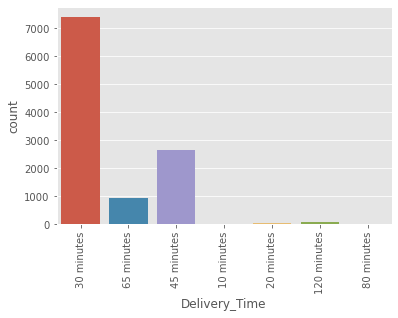

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64


Selector 	 53.4 %
Selector 	 19.22 %
Selector 	 6.66 %
Selector 	 0.45 %
Selector 	 0.14 %
Selector 	 0.1 %
Selector 	 0.03 %


In [31]:
sns.countplot(df['Delivery_Time'])
plt.xticks(rotation="90")
plt.show()
print(df['Delivery_Time'].value_counts()) 
d = df['Delivery_Time'].value_counts()

print("\n")
j=0
for i in d.index:
        print ('Selector',"\t", round(((d[j]/df.shape[0])*100),2),"%")
        j += 1

In [32]:
# The target variable is not evenly distributed and therefore, we need to balance it. 
# In classification we can balance the data using SMOTE or NearMiss.
# According to it if the minority class is less than 20% of the majority class, we need to balance the data.
# But the minority class in this case is below 20% of the majority class. 
# Hence, we need to use Balancing methods.

# Univariate Data Analysis

In [33]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Train_Test_Label
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Train


## Categoric

### Average_Cost

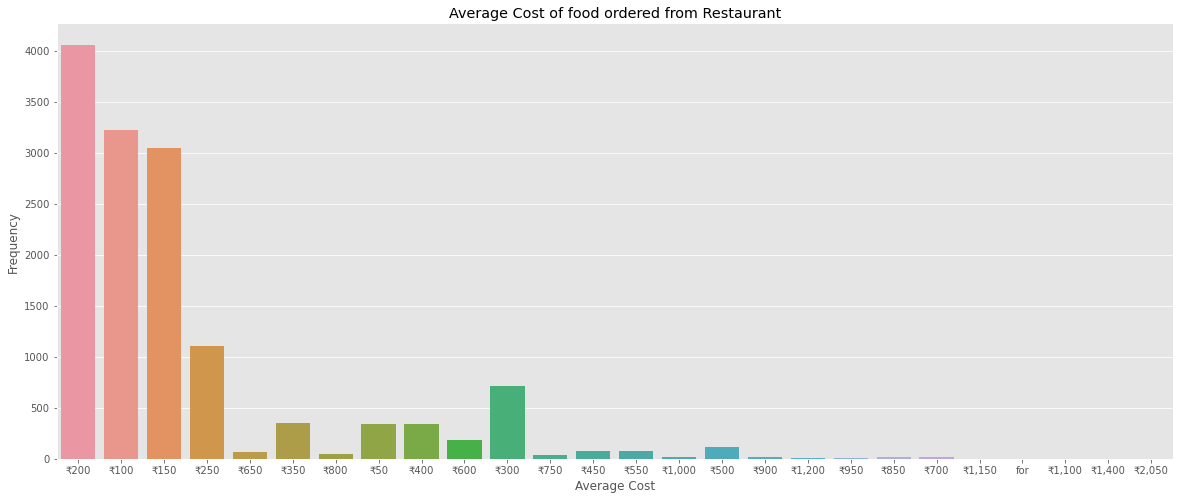

In [34]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.countplot(df['Average_Cost'])
ax.set_xlabel("Average Cost")
ax.set_ylabel("Frequency")
ax.set_title("Average Cost of food ordered from Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [35]:
# We can infer that restaurants that have average cost of food at Rupees 200 are most frequently ordered from.
# We can also say that restaurants that have higher average costs are ordered from less frequently. 
# There is also a category (for) which needs to be taken care off, during Data Cleaning.

### Minimum Order

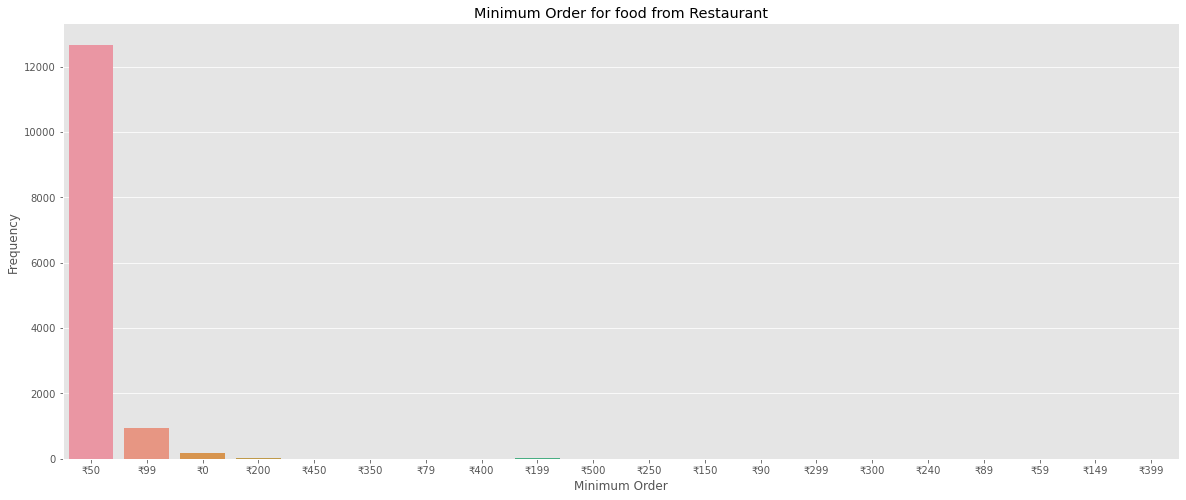

In [36]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.countplot(df['Minimum_Order'])
ax.set_xlabel("Minimum Order")
ax.set_ylabel("Frequency")
ax.set_title("Minimum Order for food from Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [37]:
# We can infer that restaurants that have minimum order cost of food at Rupees 50 are most frequently ordered from.
# We can also say that restaurants that have higher minimum order costs are ordered from less frequently
# We can see that quite a few restaurants do not have a minimum order cost for food delivered and quite a few deliveries have been made from these restaurants

### Rating

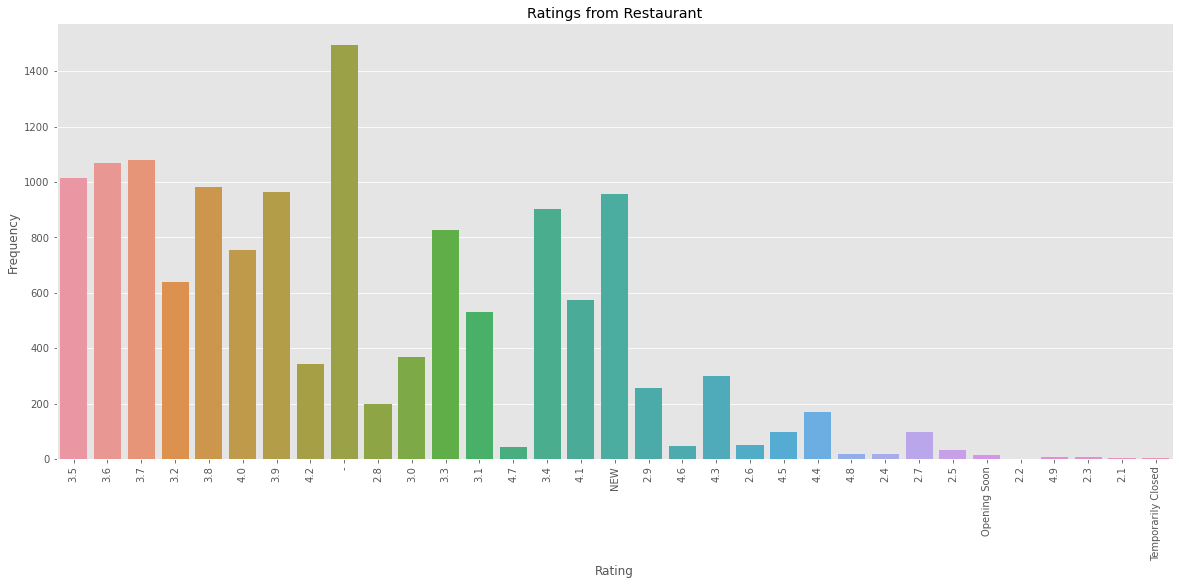

In [38]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.countplot(df['Rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Ratings from Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [39]:
# There are mixed values in Rating in the form of NEW, Opening Soon, Temporarily Closed, -
# We would need to deal with them at the time of data cleaning
# The "-" ratings of restraunt's seem to have the highest frequency, suggesting that many restaurants have not been rated, we would have to impute values for them further on.
# The known highest rating of restraunt's that occurs most frequently is 3.7 closely followed by 3.6 and 3.5 which have over 1000 people rating them.
# The least occuring restraunt rating is 2.1

## Numeric

### Votes

In [40]:
# Exclude string values
df['Votes'][df['Votes'].str.isnumeric()]

0          12
1          11
2          99
3         176
4         521
5          46
6         108
7        1731
8         110
9         562
10        186
11       1693
13        184
14         23
15        353
17        139
19        159
20         67
21        387
22          5
23        138
24          4
26        110
27         15
28         44
29         18
30         18
31        189
32        279
33         22
34        581
35        914
36         23
37        105
38        305
39         54
40       1408
41        806
42         41
43        100
44        106
45         37
46         45
48         63
50        253
51          4
52         12
53        327
54         49
55         11
56          8
57         19
58         18
59          7
60         16
62        391
63         32
64         39
65        116
66         22
67         51
68          9
69        128
70        119
72         26
73        381
74        441
76         62
77          7
78         90
80       3124
81    

limit_output extension: Maximum message size of 10000 exceeded with 157554 characters

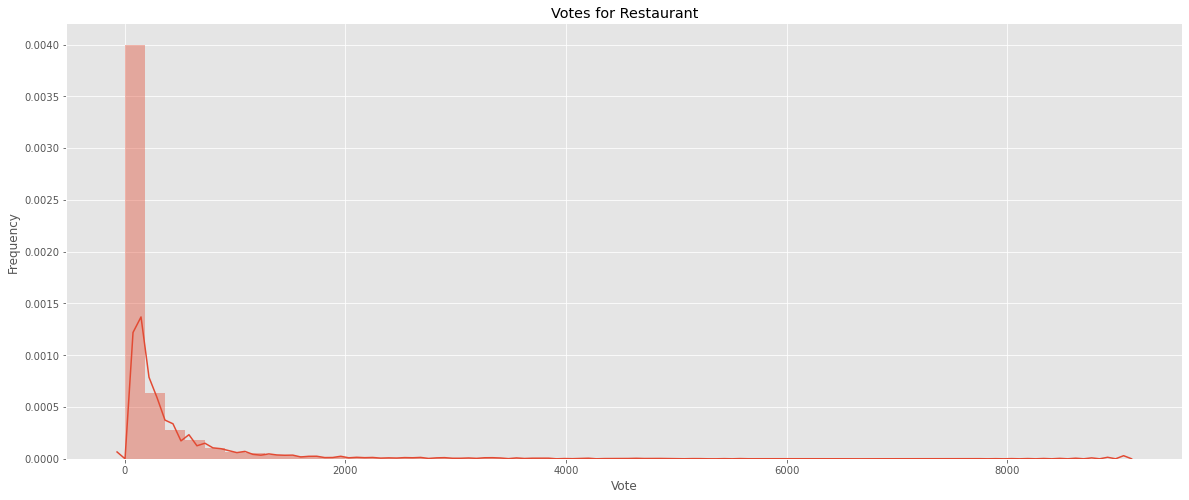

In [41]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.distplot(df['Votes'][df['Votes'].str.isnumeric()], hist=True, kde=True, bins=50)
ax.set_xlabel("Vote")
ax.set_ylabel("Frequency")
ax.set_title("Votes for Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [42]:
# We can see that the votes for restaurant's are highly right-skewed
# Votes for Restaurant's has high degree of variance

### Reviews

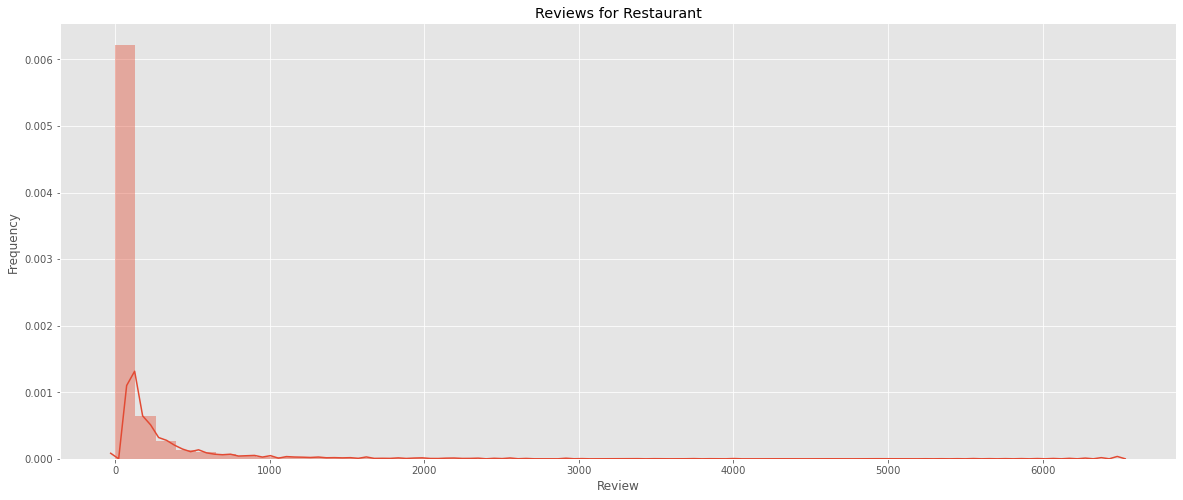

In [43]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.distplot(df['Reviews'][df['Reviews'].str.isnumeric()], hist=True, kde=True, bins=50)
ax.set_xlabel("Review")
ax.set_ylabel("Frequency")
ax.set_title("Reviews for Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [44]:
# We can see that the Reviews for restaurant's are highly right-skewed
# Reviews for Restaurant's has high degree of variance

### Delivery Time

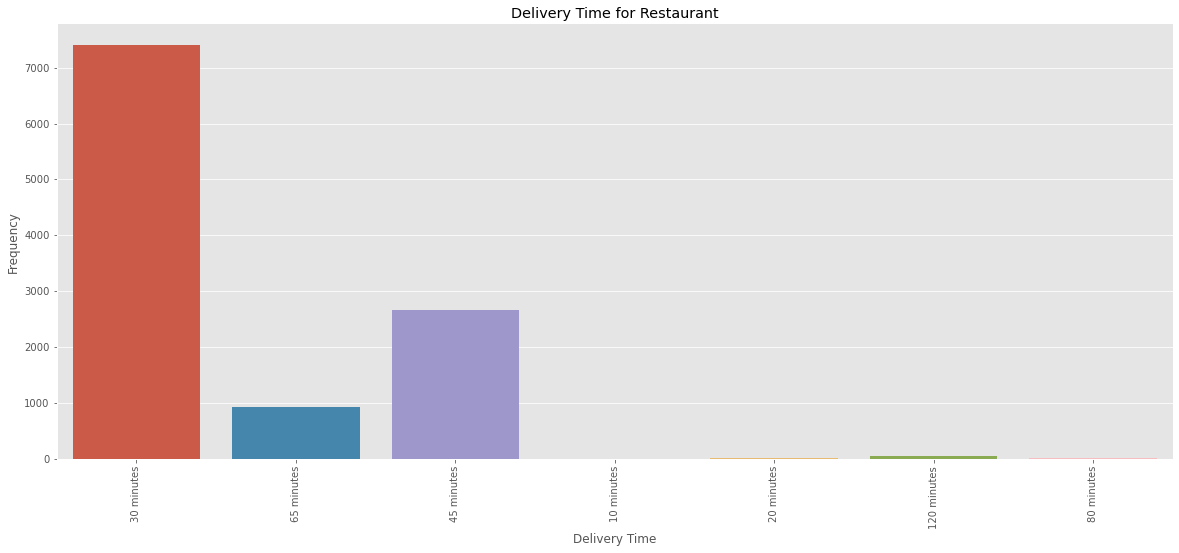

In [45]:
plt.figure(figsize=(20,8))

# Using the Artist Layer
ax = sns.countplot(train['Delivery_Time'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Delivery Time")
ax.set_ylabel("Frequency")
ax.set_title("Delivery Time for Restaurant")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [46]:
# We can see that most restaurants claim to deliver food by 30 minutes, while some 45 minutes, 65 minutes
# There are barely any restaurants who claim to deliver food in 10 minutes, 20 mins
# Also very fw restaurants take more than 60 mins to deliver food

# Multivariate Data Analysis

In [47]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Train_Test_Label
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Train


## Categoric VS Categoric

__Cross Tab/ two-way table:__ 
We can start analysing the relationship by creating a two-way table of count and count%. The rows represent the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. 

To create a two-way table, pass two variables to the pd.crosstab().

__Stacked Column Chart:__ This method is more of a visual form of a Two-way table.


### Average Cost VS Delivery Time

In [48]:
# Two-way table
df.groupby(["Average_Cost", "Delivery_Time"]).size()

Average_Cost  Delivery_Time
for           30 minutes          1
₹1,000        30 minutes          7
              45 minutes          4
              65 minutes          1
₹1,100        45 minutes          1
₹1,150        30 minutes          1
₹1,200        30 minutes          2
              45 minutes          2
              65 minutes          4
₹1,400        45 minutes          1
₹100          10 minutes          1
              120 minutes        12
              20 minutes          2
              30 minutes       2024
              45 minutes        420
              65 minutes         96
              80 minutes          2
₹150          10 minutes          3
              120 minutes        11
              20 minutes          4
              30 minutes       1793
              45 minutes        519
              65 minutes        131
              80 minutes          1
₹2,050        30 minutes          1
₹200          120 minutes        28
              20 minutes         13


In [49]:
AvgCost_DeliveryTime_table = pd.crosstab(index=train["Average_Cost"], 
                          columns=train["Delivery_Time"])
AvgCost_DeliveryTime_table

Delivery_Time,10 minutes,120 minutes,20 minutes,30 minutes,45 minutes,65 minutes,80 minutes
Average_Cost,,,,,,,
for,0,0,0,1,0,0,0
"₹1,000",0,0,0,7,4,1,0
"₹1,100",0,0,0,0,1,0,0
"₹1,150",0,0,0,1,0,0,0
"₹1,200",0,0,0,2,2,4,0
"₹1,400",0,0,0,0,1,0,0
₹100,1,12,2,2024,420,96,2
₹150,3,11,4,1793,519,131,1
"₹2,050",0,0,0,1,0,0,0


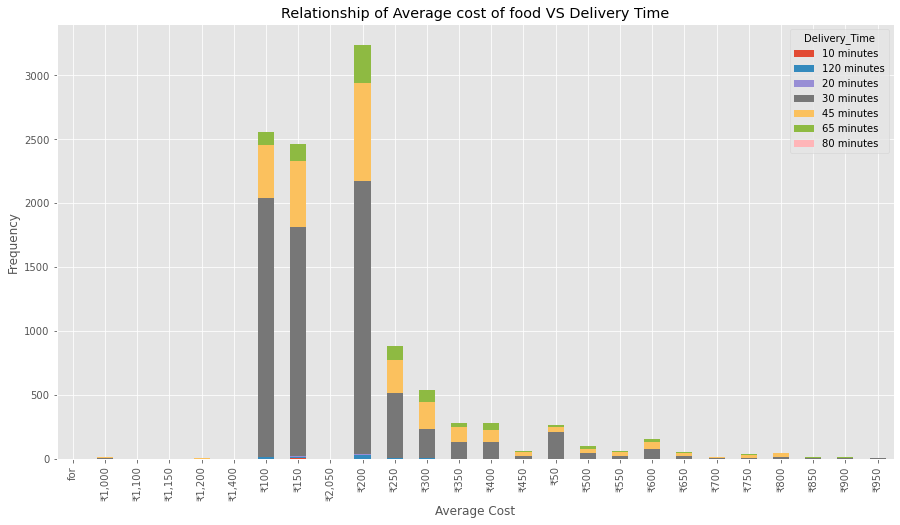

In [50]:
AvgCost_DeliveryTime_table.plot(kind="bar", figsize=(15,8), align = "center", stacked = True)
plt.xlabel("Average Cost")
plt.ylabel("Frequency")
plt.title("Relationship of Average cost of food VS Delivery Time")
plt.show()

In [51]:
# We can infer that we have maximum number of restaurants with Delivery Time 20 mins and having an average cost of food as 100, 150 and 200 rupees.
# We can infer that we have a number of restaurants with Delivery Time 45 mins and having an average cost of food as 100, 150 200 rupees.
# We have a few restaurants with Delivery Time 65 mins and having an average cost of food as 100, 150 200 rupees.
# The rest of the delivery times and costs of food for restaurants dont seem to be much.
# We can infer that most restaurants deliver food in 30 mins with avergae cost of food as somewhere around (100-200) rupees. Restaurants below and above this category don't seem to be ordered from much.

In [ ]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
X = [  (4,2,1),(4,2,2), (4,2,3), (4,2,5), (4,2,(4,6)), (4,1,4)]
plt.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

plt.show()

### Minimum Order VS Delivery Time

In [52]:
MinOrder_DeliveryTime_table = pd.crosstab(index=train["Minimum_Order"], 
                          columns=train["Delivery_Time"])
MinOrder_DeliveryTime_table

Delivery_Time,10 minutes,120 minutes,20 minutes,30 minutes,45 minutes,65 minutes,80 minutes
Minimum_Order,,,,,,,
₹0,0,0,0,117,28,13,0
₹150,0,0,0,0,1,0,0
₹199,0,0,0,0,8,0,0
₹200,0,2,0,0,3,3,0
₹240,0,0,0,0,1,0,0
₹250,0,0,0,0,1,0,0
₹299,0,0,0,2,0,1,0
₹300,0,0,0,0,2,0,0
₹350,0,0,0,0,2,1,0


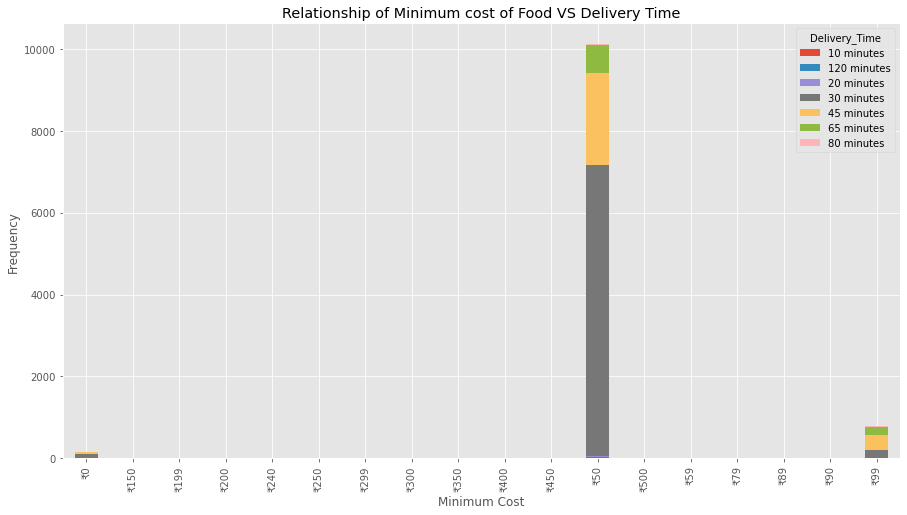

In [53]:
MinOrder_DeliveryTime_table.plot(kind="bar", figsize=(15,8), align = "center", stacked = True)
plt.xlabel("Minimum Cost")
plt.ylabel("Frequency")
plt.title("Relationship of Minimum cost of Food VS Delivery Time")
plt.show()

In [54]:
# It is obvious that restaurants with minimum price of food at 50 rupees and having delivery time in 30 minutes are most ordered from.
# Also there are a number of restaurants with minimum price of food at 50 rupees and having delivery time in 45 minutes.
# There are few restaurants with minimum price of food at 50 rupees and having delivery time in 65 minutes.
# There are very few any restaurants that have minimum price of food at 0 and 90 rupees and various delivery times that are ordered from.
# Rest of the minimum food prices and deliveery times for the same dont seem to be doing well with customers ordering food.

### Rating VS Delivery Time

In [55]:
Rating_DeliveryTime_table = pd.crosstab(index=train["Rating"], 
                          columns=train["Delivery_Time"])
Rating_DeliveryTime_table

Delivery_Time,10 minutes,120 minutes,20 minutes,30 minutes,45 minutes,65 minutes,80 minutes
Rating,,,,,,,
-,0,6,0,1103,56,26,0
2.1,0,0,0,1,0,0,0
2.2,0,0,0,0,0,1,0
2.3,0,0,0,4,2,0,0
2.4,0,2,0,5,3,3,0
2.5,0,0,0,11,12,4,0
2.6,0,1,0,18,16,7,0
2.7,0,4,0,37,20,15,0
2.8,0,5,0,97,41,14,0


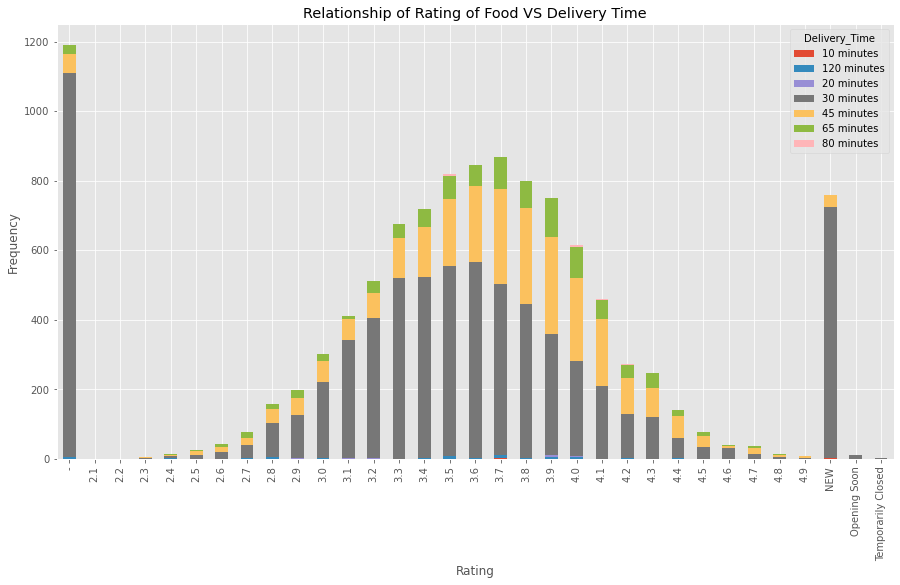

In [56]:
Rating_DeliveryTime_table.plot(kind="bar", figsize=(15,8), align = "center", stacked = True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Relationship of Rating of Food VS Delivery Time")
plt.show()

## Categoric VS Numeric

__CATPLOT DOES NOT SUPPORT SUBPLOTS, SO CANNOT USE THEM TOGETHER.__

fig, ax = plt.subplots(3,1, figsize=(20,10), sharex=True, sharey=True)

__Categorical scatter plot, catplot() as stripplot() without jitter__\
sns.stripplot(x="Delivery_Time", y="Votes", data=v1, kind="strip", height=6, aspect=3, jitter=False, ax=ax[0])\
ax[0].set_xlabel("Votes")\
ax[0].set_ylabel("Delivery Time")

__Categorical scatter plot, catplot() as swarmplot()__\
*BUT TAKES LOT OF TIME TO COMPUTE*\
sns.catplot(x="Delivery_Time", y="Votes", data=v1, kind="swarm", height=6, aspect=3, ax=ax[1])
ax[1].set_xlabel("Votes")\
ax[1].set_ylabel("Delivery Time")\
ax[1].set_title("Relationship of Votes VS Delivery Time")

__boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets__\
sns.catplot(x="Delivery_Time", y="Votes", data=v1, kind="boxen", height=6, aspect=3, ax=ax[1])\
ax[1].set_xlabel("Votes")\
ax[1].set_ylabel("Delivery Time")

__It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution__\
*BUT TAKES LOT OF TIME TO COMPUTE*\
g = sns.catplot(x="Delivery_Time", y="Votes", data=v1, kind="violin")\
sns.swarmplot(x="Delivery_Time", y="Votes", data=v1, height=6, aspect=3, ax=ax[2])\
ax[2].set_xlabel("Votes")\
ax[2].set_ylabel("Delivery Time")\
ax[2].set_title("Relationship of Votes VS Delivery Time")

__bar graph__
sns.catplot(x="Delivery_Time", y="Votes", data=v1, kind="bar", height=6, aspect=3, ax=ax[2])\
ax[2].set_xlabel("Votes")\
ax[2].set_ylabel("Delivery Time")\

plt.show()

__You can use sharex or sharey to align the horizontal or vertical axis. Setting sharex or sharey to True enables global sharing across the whole grid, i.e. also the y-axes of vertically stacked subplots have the same scale when using sharey=True.__


### Votes VS Delivery Time

In [57]:
# Exclude string values
v1 = train[train['Votes'].str.isnumeric()]
v1["Votes"] = v1["Votes"].astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
v1[v1['Votes']>1000].head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
11,ID_1696,"Yerawada, Pune, Maharashtra","Chinese, Thai, Indonesian, Italian",₹800,₹50,4.2,1693,1239,45 minutes
40,ID_5285,"Sandhurst Road, Mumbai CST Area","Mughlai, North Indian",₹200,₹50,4.0,1408,851,45 minutes
80,ID_7753,"Sandhurst Road, Mumbai CST Area","European, Continental, North Indian, Desserts",₹750,₹50,4.3,3124,1660,45 minutes
123,ID_2885,"Nathan Road, Mangaldas Road, Pune","German, Italian, Cafe",₹450,₹50,4.3,4691,2547,45 minutes


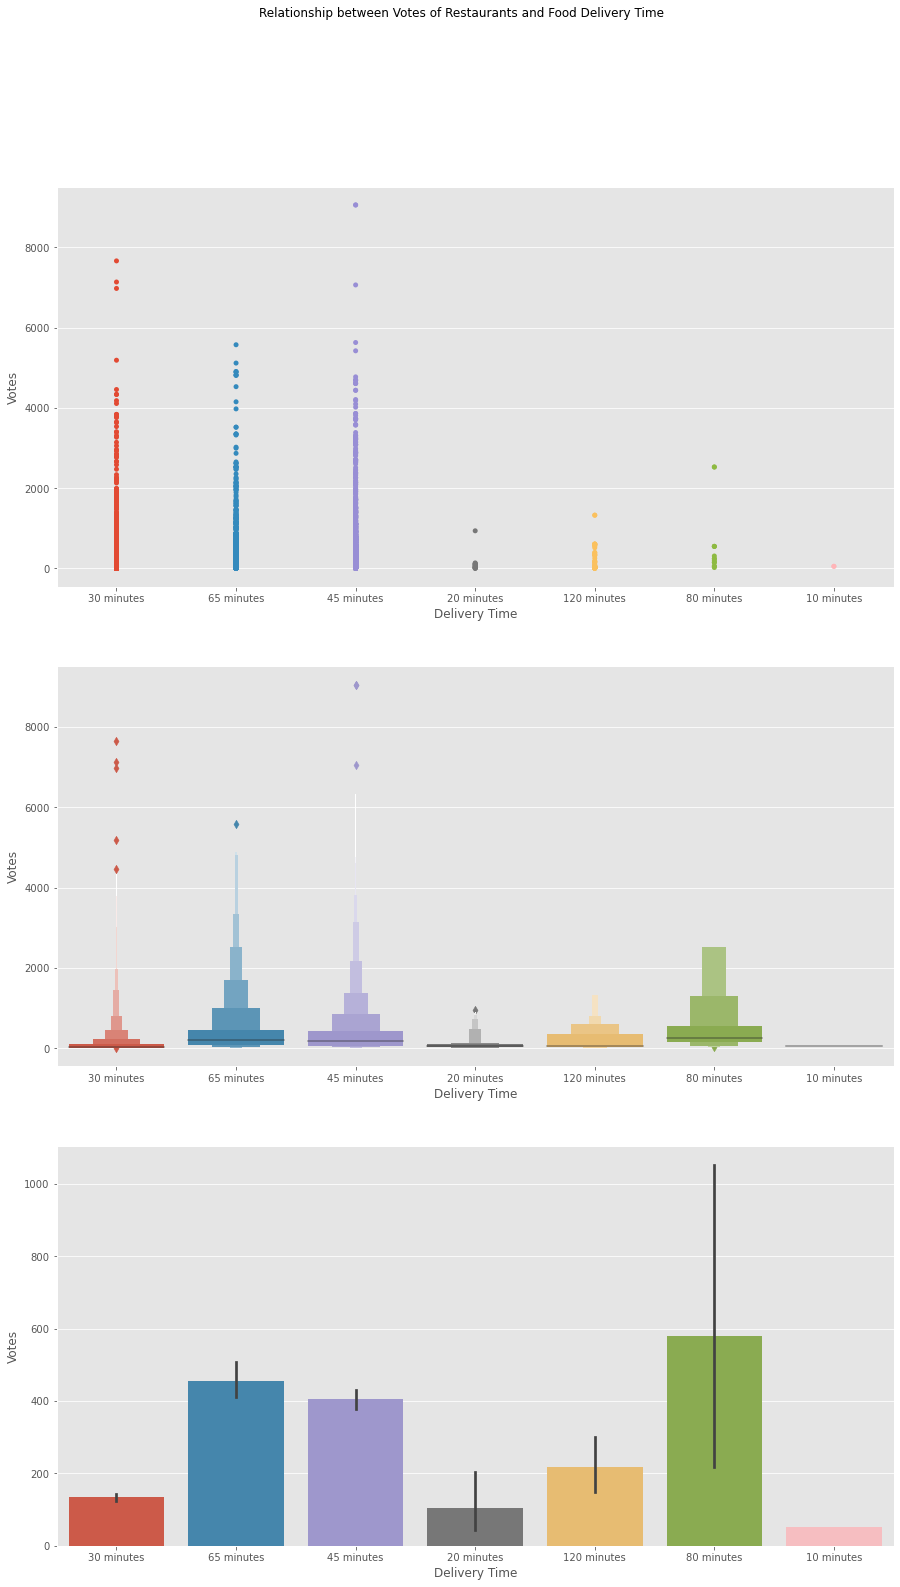

In [59]:
fig, ax = plt.subplots(3,1, figsize=(15,25))
fig.suptitle('Relationship between Votes of Restaurants and Food Delivery Time')

# Categorical scatter plot, catplot() as stripplot() without jitter
sns.stripplot(x="Delivery_Time", y="Votes", data=v1, jitter=False, ax=ax[0])
ax[0].set_ylabel("Votes")
ax[0].set_xlabel("Delivery Time")

# boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets
sns.boxenplot(x="Delivery_Time", y="Votes", data=v1, ax=ax[1])
ax[1].set_ylabel("Votes")
ax[1].set_xlabel("Delivery Time")

# bar graph
sns.barplot(x="Delivery_Time", y="Votes", data=v1, ax=ax[2])
ax[2].set_ylabel("Votes")
ax[2].set_xlabel("Delivery Time")
plt.show()

In [60]:
# We can infer that out of the 3 different plots to find the relationship between categoric and numeric valiables the stripplot and boxenplot seems to be more effective
# We can see that maximum number of total votes are given to restaurants with delivery time as 80 minutes
# Minimum number of total votes are given to restaurants with delivery time as 10 minutes
# However votes for restaurants having delivery time as 30, 45, 65 seem to have more outliers and high variation as compared to 80 minutes , which means that for these delivery times the restarants are rated quite differently.
# Restaurants with Delivery Times 30, 45, 65 have more votes than that of restaurants with other delivery times.

### Reviews VS Delivery Time

In [61]:
# Exclude string values
r1 = train[train['Reviews'].str.isnumeric()]
r1["Reviews"] = r1["Reviews"].astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
r1[r1['Reviews']>2000].head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
123,ID_2885,"Nathan Road, Mangaldas Road, Pune","German, Italian, Cafe",₹450,₹50,4.3,4691,2547,45 minutes
175,ID_4202,"Dockyard Road, Mumbai CST Area","Parsi, Bakery",₹200,₹50,4.0,4335,2363,30 minutes
281,ID_4202,"Sandhurst Road, Mumbai CST Area","Parsi, Bakery",₹200,₹50,4.0,4335,2363,30 minutes
1180,ID_1064,"Sector 3, Marathalli","Continental, North Indian, BBQ, Steak",₹800,₹50,4.7,9054,6504,45 minutes
1300,ID_1666,"Sector 1, Noida","Mexican, American, Italian, Burger",₹500,₹99,4.6,4903,3989,65 minutes


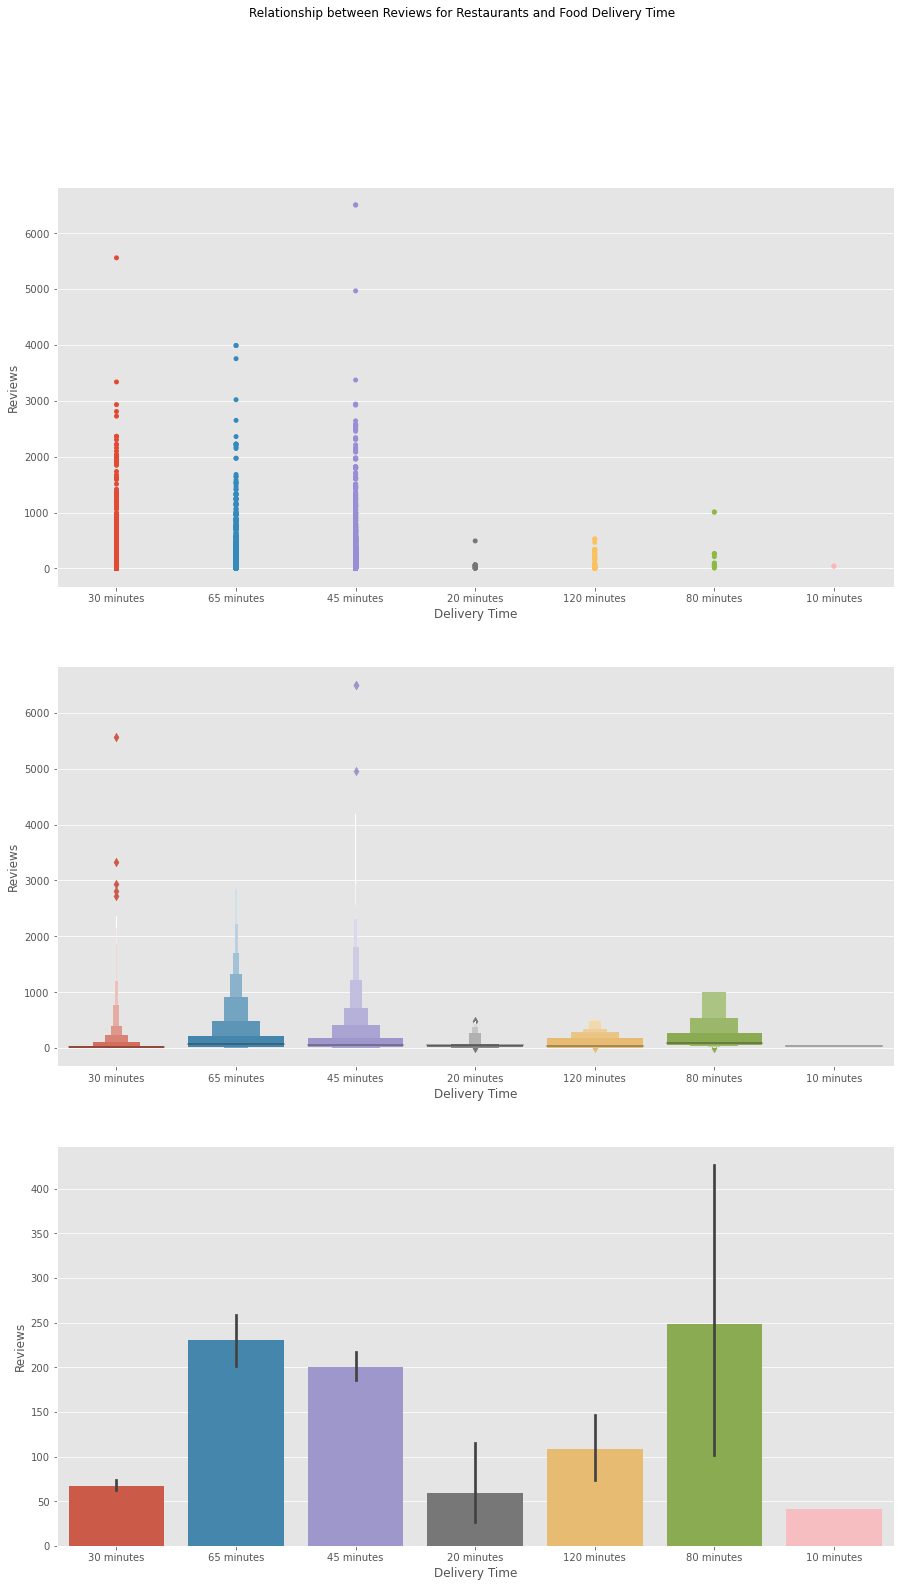

In [63]:
fig, ax = plt.subplots(3,1, figsize=(15,25))
fig.suptitle('Relationship between Reviews for Restaurants and Food Delivery Time')

# Categorical scatter plot, catplot() as stripplot() without jitter
sns.stripplot(x="Delivery_Time", y="Reviews", data=r1, jitter=False, ax=ax[0])
ax[0].set_ylabel("Reviews")
ax[0].set_xlabel("Delivery Time")

# boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets
sns.boxenplot(x="Delivery_Time", y="Reviews", data=r1, ax=ax[1])
ax[1].set_ylabel("Reviews")
ax[1].set_xlabel("Delivery Time")

# bar graph
sns.barplot(x="Delivery_Time", y="Reviews", data=r1, ax=ax[2])
ax[2].set_ylabel("Reviews")
ax[2].set_xlabel("Delivery Time")
plt.show()

In [64]:
# We can infer that out of the 3 different plots to find the relationship between categoric and numeric valiables the stripplot and boxenplot seems to be more effective
# We can see that maximum number of Reviews are given to restaurants with delivery time as 80 minutes, closely followed by 65 minutes.
# Minimum numer of total Reviews are given to restaurants with delivery time as 10 minutes
# However reviews for restaurants having delivery time as 30, 45 seem to have more outliers and high variation as compared to 80 minutes , which means that for these delivery times the restarants are reviewed quite differently.
# Restaurants with Delivery Times 30, 45, 65 have higher reviews than that of restaurants with other delivery times.

# Preliminary Data Processing

## Modifying Columns

### Modifying Column Names

In [65]:
# Renaming the required columns for df
df.rename(columns = {"Average_Cost":"Average_Cost_₹","Minimum_Order":"Minimum_Order_₹","Delivery_Time":"Delivery_Time_mins"}, inplace=True)

### Modifying Column Values

#### Removing the mixed and spaces in columns

In [66]:
# Removing the "₹", "," and "minutes" from columns to convert into int for df
df["Average_Cost_₹"] = df["Average_Cost_₹"].str.replace("₹","").str.replace(",","")
df["Minimum_Order_₹"] = df["Minimum_Order_₹"].str.replace("₹","").str.replace(",","")
df["Delivery_Time_mins"] = df["Delivery_Time_mins"].str.replace("minutes","").str.replace(",","")

In [67]:
# Removing the blanks from the column if any for df
df["Average_Cost_₹"] = df["Average_Cost_₹"].str.strip()
df["Minimum_Order_₹"] = df["Minimum_Order_₹"].str.strip()
df["Delivery_Time_mins"] = df["Delivery_Time_mins"].str.strip()

In [68]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Train
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,Train
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,Train
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,Train
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,Train


#### Retrieving the City in which the Restaurant belongs

In [69]:
df['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          1158
D-Block, Sector 63, Noida                           1027
Sector 1, Noida                                      990
FTI College, Law College Road, Pune                  734
Delhi University-GTB Nagar                           699
Sector 14, Noida                                     630
Laxman Vihar Industrial Area, Sector 3A, Gurgoan     611
Delhi Administration Flats, Timarpur                 602
Rmz Centennial, I Gate, Whitefield                   585
Mumbai Central                                       578
MG Road, Pune                                        509
Delhi High Court, India Gate                         504
Nathan Road, Mangaldas Road, Pune                    476
Sandhurst Road, Mumbai CST Area                      463
Sector 3, Marathalli                                 444
Majestic                                             411
Delhi Cantt.                                         397
Yerawada, Pune, Maharashtra    

In [70]:
# Delhi University-GTB Nagar, Delhi Cantt., Timarpur,India Gate - Delhi
# Mumbai Central, Mumbai CST Area - Mumbai
# Whitefield, Marathalli,Electronic City,Majestic - Bangalore 
# Maharashtra,Pune University  - Pune
# Begumpet - Hyderabad

In [71]:
# Split the column "Location" to get the Location, not the locality
df1 = pd.DataFrame()
df1['Area'] = df['Location'].str.rpartition(",")[0]
df1['Place'] = df['Location'].str.rpartition(",")[2]
df1.head()

,Area,Place
0,"FTI College, Law College Road",Pune
1,Sector 3,Marathalli
2,,Mumbai Central
3,Sector 1,Noida
4,"Rmz Centennial, I Gate",Whitefield


In [72]:
# Retrieve the city to which the restaurant belongs to
df['Place'] = df1['Place']
df["Place"] = df["Place"].str.strip()

In [73]:
# Let us allocate Places into regions so that we can easity categorize it.

for i in df['Place']:
    if ((i=='Delhi University') | (i=='Delhi Cantt.') | (i=='Timarpur') | (i=='India Gate') | (i=='Delhi University-GTB Nagar')):
        df['Place'] = df['Place'].str.replace(i,'Delhi')
    elif ((i=='Mumbai Central') | (i=='Mumbai CST Area')):
        df['Place'] = df['Place'].str.replace(i,'Mumbai')
    elif ((i=='Whitefield') | (i=='Marathalli') | (i=='Electronic City') | (i=='Majestic')):
        df['Place'] = df['Place'].str.replace(i,'Bangalore')
    elif ((i=='Maharashtra') | (i=='Pune University' )):
        df['Place'] = df['Place'].str.replace(i,'Pune')
    elif ((i=='Begumpet')):
        df['Place'] = df['Place'].str.replace(i,'Hyderabad')
    else:
        continue
    

In [74]:
df['Place'].unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgoan', 'Hyderabad', 'Gurgaon'], dtype=object)

In [75]:
# Thus, we have 8 different regions where the food is delivered.

df['Place'] = df['Place'].str.replace('Gurgoan','Gurgaon')
df['Place'].unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

In [76]:
df['Place'].value_counts()

Noida        2647
Bangalore    2628
Delhi        2539
Pune         2442
Mumbai       1536
Gurgaon       934
Kolkata       678
Hyderabad     464
Name: Place, dtype: int64

#### Classifying Cuisines

In [77]:
# Let's take a look at "Cuisines" for df
df2 = df['Cuisines'].str.split(', ', expand=True)
df2.rename(columns={0:"c1",1:"c2",3:"c3",4:"c4",5:"c5",6:"c6",7:"c7"}, inplace=True)
df2.head()

,c1,c2,2,c3,c4,c5,c6,c7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [78]:
# find the types of cuisines for df
df2["c1"].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [79]:
# Categorizing the food for df

fastfood = ['Fast Food','Cafe','Burger','Street Food', 'Pizza','Rolls','Momos','Finger Food', 'Sandwich','Bar Food','Wraps','Hot dogs']

beverage = ['Beverages','Tea','Juices','Bubble Tea','Coffee']

desert = ['Ice Cream','Mithai','Bakery','Mishti','Paan','Desserts','Mithai','Paan','Ice Cream','Frozen Yogurt']

starter_maincourse = ['Italian','Mughlai','South Indian','Chinese','North Indian','Biryani','Kerala','Asian','Lucknowi','Bengali'
           ,'European','Continental','Andhra', 'German','Chettinad', 'Parsi','Japanese','Salad','Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian','Konkan', 'Odia', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'Mexican', 'Goan','Greek','Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese','Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi','Iranian', 'Brazilian', 'Indian', 'African','Turkish', 'Assamese', 'Naga',
        'Middle Eastern', 'Vietnamese','Burmese','Roast Chicken','South American''Sri Lankan','South American',
       'Steak','Charcoal Chicken','Cantonese','Belgian','Charcoal Chicken','Tex-Mex','Spanish','Nepalese','Bangladeshi','Poké','BBQ','Indonesian','Israeli','Sri Lankan']

In [80]:
# categorize food into categories for df
for i in df2.columns:
    for l,c in enumerate(df2[i]):
        if c in fastfood:
            df2[i] = df2[i].replace(c,"fastfood")

        elif c in beverage:
            df2[i] = df2[i].replace(c,"beverage")
    
        elif c in desert:
            df2[i] = df2[i].replace(c,"desert")
    
        elif c in starter_maincourse:
            df2[i] = df2[i].replace(c,"main course")

In [81]:
# check if all the food has been categorized for df
for i in df2.columns:
    print(df2[i].value_counts())
    print("\n")

main course    8264
fastfood       3385
desert         1758
beverage        461
Name: c1, dtype: int64


main course    6041
fastfood       2434
desert          932
beverage        676
Name: c2, dtype: int64


main course    3098
fastfood       1265
beverage        506
desert          307
Name: 2, dtype: int64


main course    1093
fastfood        564
beverage        250
desert          203
Name: c3, dtype: int64


main course    349
fastfood       195
beverage       151
desert          99
Name: c4, dtype: int64


main course    127
fastfood        66
desert          54
beverage        49
Name: c5, dtype: int64


main course    42
fastfood       40
desert         31
beverage       27
Name: c6, dtype: int64


desert         15
fastfood       14
main course    13
beverage       13
Name: c7, dtype: int64




In [82]:
df2.head()

,c1,c2,2,c3,c4,c5,c6,c7
0,fastfood,fastfood,fastfood,main course,fastfood,None,None,None
1,desert,desert,None,None,None,None,None,None
2,main course,fastfood,fastfood,None,None,None,None,None
3,main course,main course,main course,None,None,None,None,None
4,fastfood,beverage,None,None,None,None,None,None


In [83]:
# Let us remove the NaN values
df2.isnull().sum()

c1        0
c2     3785
2      8692
c3    11758
c4    13074
c5    13572
c6    13728
c7    13813
dtype: int64

In [84]:
# Fill NaN with blank
df2.fillna(" ", inplace=True)

In [85]:
df2.isnull().sum()

c1    0
c2    0
2     0
c3    0
c4    0
c5    0
c6    0
c7    0
dtype: int64

In [86]:
df2.head()

,c1,c2,2,c3,c4,c5,c6,c7
0,fastfood,fastfood,fastfood,main course,fastfood,,,
1,desert,desert,,,,,,
2,main course,fastfood,fastfood,,,,,
3,main course,main course,main course,,,,,
4,fastfood,beverage,,,,,,


In [87]:
# Remove duplicate values in a row
for k in range(df2.shape[0]):
    c = set(df2.loc[k])
    d = list(c)
    for i in range(len(d)):
        if d[i]=='fastfood':
            df2.loc[k,'Fast Food']='fastfood'
        elif d[i]=='main course':
            df2.loc[k,'Main Course']='main course'
        elif d[i]=='desert':
            df2.loc[k,'Desert']='desert'
        elif d[i]=='beverage':
            df2.loc[k,'Beverage']='beverage'

In [88]:
# We see that there are NaN values generated
df2.head()

,c1,c2,2,c3,c4,c5,c6,c7,Fast Food,Main Course,Desert,Beverage
0,fastfood,fastfood,fastfood,main course,fastfood,,,,fastfood,main course,NaN,NaN
1,desert,desert,,,,,,,NaN,NaN,desert,NaN
2,main course,fastfood,fastfood,,,,,,fastfood,main course,NaN,NaN
3,main course,main course,main course,,,,,,NaN,main course,NaN,NaN
4,fastfood,beverage,,,,,,,fastfood,NaN,NaN,beverage


In [89]:
# Repalce the NaN values 
df2['Fast Food'].replace({np.nan:0,'fastfood':1}, inplace=True)
df2['Main Course'].replace({np.nan:0,'main course':1}, inplace=True)
df2['Beverage'].replace({np.nan:0,'beverage':1}, inplace=True)
df2['Desert'].replace({np.nan:0,'desert':1}, inplace=True)

In [90]:
df2.isnull().sum()

c1             0
c2             0
2              0
c3             0
c4             0
c5             0
c6             0
c7             0
Fast Food      0
Main Course    0
Desert         0
Beverage       0
dtype: int64

In [91]:
# Merge the values in the Main Dataframe "df"
df['Fast Food'] = df2['Fast Food']
df['Main Course'] = df2['Main Course']
df['Beverage'] = df2['Beverage']
df['Desert'] = df2['Desert']

In [92]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Train,Pune,1,1,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,Train,Bangalore,0,0,0,1
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,Train,Mumbai,1,1,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,Train,Noida,0,1,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,Train,Bangalore,1,0,1,0


## Data Cleaning (Handling Mixed and Missing values)

### Average Cost

In [93]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Train,Pune,1,1,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,Train,Bangalore,0,0,0,1
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,Train,Mumbai,1,1,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,Train,Noida,0,1,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,Train,Bangalore,1,0,1,0


In [94]:
# value_counts does not mention mixed values
df['Average_Cost_₹'].value_counts()

200     4061
100     3221
150     3051
250     1104
300      710
350      354
400      346
50       337
600      184
500      116
550       73
450       72
650       63
800       50
750       41
700       19
850       16
1000      16
900       15
1200      10
950        4
1400       1
for        1
2050       1
1150       1
1100       1
Name: Average_Cost_₹, dtype: int64

In [95]:
# Find mixed values for "Average_Cost_₹"
df['Average_Cost_₹'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1000', '500', '900', '1200',
       '950', '850', '700', '1150', 'for', '1100', '1400', '2050'],
      dtype=object)

In [96]:
# Find out how many restaurants do not have Average average cost in rupees
# we have just 1 record with unknown Average cost, no votes, reviews
df[df['Average_Cost_₹']=='for']

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
6297,ID_6472,Pune University,Fast Food,for,50,NEW,-,-,30,Train,Pune,1,0,0,0


In [97]:
# Trying to impute the Average Cost, votes and Reviews of the Restaurant based on others in the locality having the same Cuisine
df[(df['Cuisines']=='Fast Food') & (df['Location']=='Pune University') & (df['Average_Cost_₹']!='for') & (df['Minimum_Order_₹']=='50') & (df['Delivery_Time_mins']=='30') & (df['Votes']=="-") & (df['Reviews']=="-")]

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
794,ID_4886,Pune University,Fast Food,200,50,-,-,-,30,Train,Pune,1,0,0,0
9064,ID_6526,Pune University,Fast Food,50,50,-,-,-,30,Train,Pune,1,0,0,0


In [98]:
df['Average_Cost_₹'].sum()
# the result is a concatenated string

'200100150250200150150650100200350800150501001001002001501002001502502001501001001501502001504002003501006001001002003002001501501002002002002002002001501501002002501001502501001003501006002002001501002001503003001502001003501001001001001007501001502001502001502001005015015010020020010020010010015030020020010020010020020015010020020015010015015030025015015010020030045035010015050200300250150100150502001501501002001003001501002505015015015015020015020010025015015015020020025010020010025020010060015015030020015020010020040055015050350150200200150200100150150200100300150150150100200650200350100150150400150800150200150150200150200200200150150100100150150250250200150100010015010015050100100100100100150150100200300100150250150150300300200300200200100150250100200200150100150100150150100200100250150250200100650150250100100300150200250200600100100200100200200150350350501001502002001002002502002001003501001001001502001005001002002001502002501003001001002002002501502501001501502002001005030030055

limit_output extension: Maximum message size of 10000 exceeded with 41299 characters

In [99]:
# Converting to integer
df['Average_Cost_₹'] = pd.to_numeric(df['Average_Cost_₹'], errors='coerce', downcast='integer')
print("Data type of Average Cost for df DataFrame\n",df['Average_Cost_₹'].dtypes)

Data type of Average Cost for df DataFrame
 float64


In [100]:
df['Average_Cost_₹'].value_counts()

200.0     4061
100.0     3221
150.0     3051
250.0     1104
300.0      710
350.0      354
400.0      346
50.0       337
600.0      184
500.0      116
550.0       73
450.0       72
650.0       63
800.0       50
750.0       41
700.0       19
1000.0      16
850.0       16
900.0       15
1200.0      10
950.0        4
1150.0       1
1100.0       1
2050.0       1
1400.0       1
Name: Average_Cost_₹, dtype: int64

In [101]:
mean_puneU_fast_food=int(round(df['Average_Cost_₹'][(df['Cuisines']=='Fast Food') & (df['Location']=='Pune University') & (df['Minimum_Order_₹']=='50') & (df['Delivery_Time_mins']=='30') & (df['Votes']=="-") & (df['Reviews']=="-")].mean(),0))
mean_puneU_fast_food

125

In [102]:
df['Average_Cost_₹'][df['Average_Cost_₹'].isnull()]=mean_puneU_fast_food

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df['Average_Cost_₹'] = df['Average_Cost_₹'].astype(int)
print("Data type for df DataFrame\n",df.dtypes)

Data type for df DataFrame
 Restaurant            object
Location              object
Cuisines              object
Average_Cost_₹         int32
Minimum_Order_₹       object
Rating                object
Votes                 object
Reviews               object
Delivery_Time_mins    object
Train_Test_Label      object
Place                 object
Fast Food              int64
Main Course            int64
Beverage               int64
Desert                 int64
dtype: object


In [104]:
df["Average_Cost_₹"].value_counts()

200     4061
100     3221
150     3051
250     1104
300      710
350      354
400      346
50       337
600      184
500      116
550       73
450       72
650       63
800       50
750       41
700       19
1000      16
850       16
900       15
1200      10
950        4
1150       1
1400       1
1100       1
125        1
2050       1
Name: Average_Cost_₹, dtype: int64

### Minimum Order

In [105]:
# Find mixed values for "Average_Cost_₹"
df['Minimum_Order_₹'].unique()

array(['50', '99', '0', '200', '450', '350', '79', '400', '199', '500',
       '250', '150', '90', '299', '300', '240', '89', '59', '149', '399'],
      dtype=object)

In [106]:
# Convert it into "int" datatype
df['Minimum_Order_₹'] = df['Minimum_Order_₹'].astype("int")
df['Minimum_Order_₹'].dtypes

dtype('int32')

### Rating

In [107]:
df['Rating'].dtypes

dtype('O')

In [108]:
# Find mixed values for "Average_Cost_₹"
df['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [109]:
# Find out how many restaurants are either temporarily closed or Opening Soon
df[(df['Rating']=='Opening Soon') | (df['Rating']=='Temporarily Closed') | (df['Rating']=='NEW') | (df['Rating']=='-')]

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
12,ID_1156,"Sector 1, Noida","Burger, Fast Food, Desserts, Beverages",150,50,-,-,-,30,Train,Noida,1,0,1,1
16,ID_2141,"Sector 1, Noida",Italian,100,50,-,-,-,30,Train,Noida,0,1,0,0
18,ID_5262,Pune University,"Kerala, Bihari",150,50,-,-,-,30,Train,Pune,0,1,0,0
25,ID_4944,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100,50,-,-,-,45,Train,Bangalore,0,0,0,1
47,ID_2809,"Mico Layout, Stage 2, BTM Layout,Bangalore",Chinese,200,50,NEW,-,-,30,Train,Bangalore,0,1,0,0
49,ID_4866,Delhi University-GTB Nagar,Lucknowi,200,50,-,-,-,30,Train,Delhi,0,1,0,0
61,ID_294,"Sector 1, Noida","Bakery, Desserts, Fast Food",100,50,NEW,-,-,30,Train,Noida,1,0,0,1
71,ID_3309,"D-Block, Sector 63, Noida","Chinese, Rolls",150,50,-,-,-,30,Train,Noida,1,1,0,0
75,ID_3087,"Chandni Chowk, Kolkata","Fast Food, Bengali",100,50,-,-,-,30,Train,Kolkata,1,1,0,0
79,ID_6205,"Sector 14, Noida",Rolls,100,50,NEW,-,-,30,Train,Noida,1,0,0,0


limit_output extension: Maximum message size of 10000 exceeded with 883322 characters

In [110]:
df['Rating'].value_counts()

-                     1496
3.7                   1081
3.6                   1069
3.5                   1015
3.8                    983
3.9                    965
NEW                    958
3.4                    903
3.3                    828
4.0                    755
3.2                    640
4.1                    574
3.1                    531
3.0                    367
4.2                    342
4.3                    299
2.9                    256
2.8                    198
4.4                    171
2.7                     98
4.5                     96
2.6                     51
4.6                     48
4.7                     42
2.5                     33
2.4                     18
4.8                     16
Opening Soon            14
4.9                      8
2.3                      8
2.1                      2
Temporarily Closed       2
2.2                      1
Name: Rating, dtype: int64

#### Imputing values for Temporarilty Closed

In [111]:
df[(df['Rating']=='Temporarily Closed')]

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
7097,ID_5580,Majestic,"Italian, Salad",600,50,Temporarily Closed,894,-,30,Train,Bangalore,0,1,0,0
8173,ID_6010,"Sandhurst Road, Mumbai CST Area","Sandwich, Pizza, Finger Food, Burger, Wraps",100,50,Temporarily Closed,42,-,30,Train,Mumbai,1,0,0,0


In [112]:
# Assuming the restaurant has the similar number of votes and that separate charges for delivery along with other characteristics
df[(df['Rating']!='Temporarily Closed') & (df['Location']=='Majestic') & (df['Main Course']==1) & (df['Average_Cost_₹']==600) & (df['Minimum_Order_₹']==50) & (df['Delivery_Time_mins'].isnull()==False)]

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
771,ID_6080,Majestic,"Rajasthani, North Indian",600,50,4.3,860,484,65,Train,Bangalore,0,1,0,0
5434,ID_1665,Majestic,"American, Tex-Mex, Burger, BBQ, Mexican",600,50,4.7,7135,5558,30,Train,Bangalore,1,1,0,0
10784,ID_6620,Majestic,"Continental, North Indian, Chinese",600,50,3.8,101,40,30,Train,Bangalore,0,1,0,0


In [113]:
# Hence, we assign the Rating as "4.3" for Restaurant with ID_5580

In [114]:
# Assuming the restaurant has similar Dilevery time along with other characteristics
df[(df['Rating']!='Temporarily Closed') & (df['Location']=='Sandhurst Road, Mumbai CST Area') & (df['Fast Food']==1) & (df['Average_Cost_₹']==100) & (df['Minimum_Order_₹']==50)  & (df['Main Course']==0) & (df['Beverage']==0) & (df['Desert']==0) & (df['Delivery_Time_mins']=='30') & (df['Rating']!='NEW')& (df['Rating']!='-')]

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Place,Fast Food,Main Course,Beverage,Desert
654,ID_2132,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,3.3,10,4,30,Train,Mumbai,1,0,0,0
952,ID_1586,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,2.9,5,2,30,Train,Mumbai,1,0,0,0
1097,ID_3788,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,3.4,12,7,30,Train,Mumbai,1,0,0,0
1652,ID_3034,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,3.3,7,5,30,Train,Mumbai,1,0,0,0
2197,ID_8553,"Sandhurst Road, Mumbai CST Area",Pizza,100,50,2.9,4,2,30,Train,Mumbai,1,0,0,0
2538,ID_3712,"Sandhurst Road, Mumbai CST Area",Street Food,100,50,3.5,18,8,30,Train,Mumbai,1,0,0,0
2767,ID_8596,"Sandhurst Road, Mumbai CST Area",Momos,100,50,3.4,20,7,30,Train,Mumbai,1,0,0,0
5006,ID_6588,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,2.8,12,6,30,Train,Mumbai,1,0,0,0
8709,ID_7281,"Sandhurst Road, Mumbai CST Area",Fast Food,100,50,3.1,7,1,30,Train,Mumbai,1,0,0,0
9216,ID_1004,"Sandhurst Road, Mumbai CST Area","Fast Food, Sandwich",100,50,3.0,4,1,30,Train,Mumbai,1,0,0,0


In [115]:
# Hence, we assign the Rating as "3.1" for Restaurant with ID_6010
round(df['Rating'][(df['Rating']!='Temporarily Closed') & (df['Location']=='Sandhurst Road, Mumbai CST Area') & (df['Fast Food']==1) & (df['Average_Cost_₹']==100) & (df['Minimum_Order_₹']==50)  & (df['Main Course']==0) & (df['Beverage']==0) & (df['Desert']==0) & (df['Delivery_Time_mins']=='30') & (df['Rating']!='NEW')& (df['Rating']!='-')].astype('float').mean(),1)

3.1

In [116]:
# Assign values to the restaurants with Rating as "Temporarity CLosed"
df['Rating'][df['Restaurant']=="ID_5580"] = 4.3
df['Rating'][df['Restaurant']=="ID_6010"] = 3.1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
df['Rating'].value_counts()

-               1496
3.7             1081
3.6             1069
3.5             1015
3.8              983
3.9              965
NEW              958
3.4              903
3.3              828
4.0              755
3.2              640
4.1              574
3.1              531
3.0              367
4.2              342
4.3              298
2.9              256
2.8              198
4.4              171
2.7               98
4.5               96
2.6               51
4.6               48
4.7               42
2.5               33
2.4               18
4.8               16
Opening Soon      14
4.9                8
2.3                8
2.1                2
4.3                2
2.2                1
3.1                1
Name: Rating, dtype: int64

#### Imputing values for Opening Soon, NEW, -

In [118]:
# The manual technique used for Imputing values for Rating of hotels having values "opening Soon","NEW" and "-" seems to prove inneffective and time consuming.
# Also substitution with mean/mode/median would not give a precise result.
# Aim is to impute values based on the characteristics of the restaurant, hence we will use KNN-Imputer.

In [119]:
# Make Opening Soon, NEW, - to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].isnull().sum()

2468

#### Analysis of the groups using GroupBy

### Votes

In [120]:
df['Votes'].value_counts()

-       2616
4        298
6        255
7        242
9        238
5        227
8        216
12       191
10       173
11       173
13       144
15       143
16       133
18       127
14       123
22       120
20       115
19       111
17       103
26        98
27        96
21        90
37        89
23        86
28        85
25        83
24        83
29        81
31        80
36        77
34        77
30        76
35        73
51        67
45        58
43        56
47        56
39        55
46        55
52        54
60        54
41        54
42        53
66        53
32        53
33        51
40        51
53        50
50        49
38        49
49        48
73        48
61        46
48        46
56        43
109       43
57        42
64        42
67        42
58        42
59        40
87        40
44        39
63        38
55        37
62        37
75        37
77        36
108       36
81        35
92        35
76        35
100       34
90        34
79        34
94        34
71        33

limit_output extension: Maximum message size of 10000 exceeded with 15378 characters

In [121]:
# 2074 entries for Votes do not have entries, we can't manually replace Nan based '-' with values. We would need to impute them.

In [122]:
# Make '-' to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].isnull().sum()

2616

### Reviews

In [123]:
df['Reviews'].value_counts()

-       2905
2        551
1        483
3        466
4        428
5        320
7        264
6        260
8        242
9        239
10       223
11       193
12       169
14       158
13       157
23       141
15       138
18       136
17       131
16       128
24       113
30       111
20       109
22        99
19        92
26        90
21        88
32        86
31        86
25        86
28        85
27        72
41        71
29        70
40        69
34        68
38        68
39        65
47        65
35        65
36        64
33        62
44        56
43        54
53        50
42        48
46        48
55        47
62        47
48        47
56        47
37        46
51        45
72        43
49        42
45        41
61        40
57        39
68        38
58        37
50        36
64        35
90        35
74        34
80        33
63        32
60        30
52        29
83        27
91        27
70        27
73        27
78        27
89        27
96        26
143       26
84        26

limit_output extension: Maximum message size of 10000 exceeded with 10570 characters

In [124]:
# 2312 entries for Reviews do not have entries, we can't manually replace Nan based '-' with values. We would need to impute them.

In [125]:
# Make '-' to NaN
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'].isnull().sum()

2905

### Delivery Time

In [126]:
df['Delivery_Time_mins'].value_counts()

30     7406
45     2665
65      923
120      62
20       20
80       14
10        4
Name: Delivery_Time_mins, dtype: int64

In [127]:
df['Delivery_Time_mins'].isnull().sum()

2774

In [128]:
df['Train_Test_Label'][df['Delivery_Time_mins'].isnull()].unique()

array(['Test'], dtype=object)

In [129]:
# There are no NaN values in Train, however it is obvious that Test would have NaN values as its the target variable.
# Hence, we can ignore it.

In [130]:
df['Delivery_Time_mins'].dtypes

dtype('O')

In [131]:
# Convert from string to int, Train labels
delivery = df['Delivery_Time_mins'][df['Train_Test_Label']=="Train"].astype('int')
delivery.dtypes

dtype('int32')

In [132]:
# Assign the values to df 
df['Delivery_Time_mins'][df['Train_Test_Label']=="Train"] = delivery

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Place

In [133]:
# One-Hot Encode he Place attribute
df = pd.get_dummies(data = df, columns=['Place'], prefix="Place")
df.head()

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30,Train,1,1,0,0,0,0,0,0,0,0,0,1
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30,Train,0,0,0,1,1,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65,Train,1,1,0,0,0,0,0,0,0,1,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30,Train,0,1,0,0,0,0,0,0,0,0,1,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65,Train,1,0,1,0,1,0,0,0,0,0,0,0


## Find Optimal value of K

### Thumb Rule

In [134]:
# Create new dataframe 
df_new = df.copy()

In [135]:
# Drop categorical columns
df_new.drop(['Restaurant','Location','Cuisines','Delivery_Time_mins','Train_Test_Label'], axis=1, inplace=True)

In [136]:
df_new.head()

,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune
0,200,50,3.5,12.0,4.0,1,1,0,0,0,0,0,0,0,0,0,1
1,100,50,3.5,11.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0
2,150,50,3.6,99.0,30.0,1,1,0,0,0,0,0,0,0,1,0,0
3,250,99,3.7,176.0,95.0,0,1,0,0,0,0,0,0,0,0,1,0
4,200,99,3.2,521.0,235.0,1,0,1,0,1,0,0,0,0,0,0,0


In [137]:
# Thumb rule, to find value of k, use N samples, sqrt(N)/2
round(np.sqrt(df_new.shape[0]),0)

118.0

### Use GridSearch CV for optimizing Thumb Rule result

#### Base Model

In [138]:
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [139]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Delivery_Time_mins,Train_Test_Label,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30,Train,1,1,0,0,0,0,0,0,0,0,0,1
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30,Train,0,0,0,1,1,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65,Train,1,1,0,0,0,0,0,0,0,1,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30,Train,0,1,0,0,0,0,0,0,0,0,1,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65,Train,1,0,1,0,1,0,0,0,0,0,0,0


In [140]:
# Select the Train data, which will be further split as train and test for Imputation usig KNN
df_knn = df.copy()
df_knn = df[df['Train_Test_Label']=="Train"].drop(['Restaurant','Location','Cuisines','Train_Test_Label'], axis = 1).astype("float")
# df_knn = df[df['Train_Test_Label']=="Train"].drop(['Restaurant','Location','Cuisines','Train_Test_Label','Fast Food','Place_Bangalore'], axis = 1)
df_knn.dropna(inplace=True)

In [141]:
df_knn.shape, df.shape

((8782, 18), (13868, 22))

In [142]:
round(np.sqrt(df_knn.shape[0]),0)

94.0

In [143]:
# Classes are imbalanced
df_knn["Delivery_Time_mins"].value_counts()

30.0     5249
45.0     2549
65.0      894
120.0      56
20.0       18
80.0       14
10.0        2
Name: Delivery_Time_mins, dtype: int64

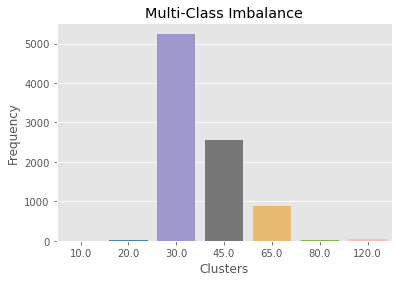

In [144]:
sns.countplot(df_knn["Delivery_Time_mins"])
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Imbalance')
plt.show()

In [145]:
# we see that there is class imbalance. However, KNN algorithm is not affected by Class imbalance

#In principal, unbalanced classes are not a problem at all for the k-nearest neighbor algorithm.
# Because the algorithm is not influenced in any way by the size of the class, it will not favor any on the basis of size. Try to run k-means with an obvious outlier and k+1 and you will see that most of the time the outlier will get its own class.
#Of course, with hard datasets it is always advisable to run the algorithm multiple times. This is to avoid trouble due to a bad initialization.

In [146]:
#df_knn1 = df_knn[(df_knn['Delivery_Time_mins']!=10.0)]
X = df_knn.drop(['Delivery_Time_mins'], axis = 1)
y = df_knn['Delivery_Time_mins']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

# It’s important to stratify y when doing a train_test_split on imbalanced classes, or on a small dataset.

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train Model and Predict
k = 94
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
Pred_y_train = neigh.predict(X_train)
Pred_y_test = neigh.predict(X_test)
# print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))
print("Train Accuracy of model at K=94 is:",metrics.accuracy_score(y_train, Pred_y_train))
print("Test Accuracy of model at K=94 is:",metrics.accuracy_score(y_test, Pred_y_test))

Train Accuracy of model at K=94 is: 0.6251830161054173
Test Accuracy of model at K=94 is: 0.615180265654649


In [148]:
#Train Accuracy of model at K=118 is: 0.6222547584187409
#Test Accuracy of model at K=118 is: 0.6113851992409867
    
#Train Accuracy of model at K=94 is: 0.622417439401334
#Test Accuracy of model at K=94 is: 0.6212523719165085

In [149]:
# As we can see that, if we use thumb rule k=94, we get an almost generalized model
# Let us further use RandomizedSearchCV to find a better result.

#### Randomized SearchCV

In [150]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(neigh.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 94,
 'p': 2,
 'weights': 'uniform'}


In [151]:
from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters that we want to tune.

#n_neighbors = list(range(1,1001,100))
#n_neighbors = list(range(1,501,50))
#n_neighbors = list(range(1,301,30))
#n_neighbors = list(range(1,401,20))
#n_neighbors = list(range(1,401,10))
n_neighbors = list(range(1,311,1))

p=[1,2]

weights = ['uniform','distance']

             
# Create the random grid
random_grid = {
 'n_neighbors': n_neighbors,
 'p': p,
 'weights': weights}

In [152]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid,
                              n_iter = 10, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
knn_random.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Nicholas Lee D'Souza\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.4s finished


In [153]:
knn_random.best_params_

# 31, p=1, weights=distance
# 61, p=2, weights=distance
# 39, p=2, weights=distance


#SMOT
# 'weights': 'distance', 'p': 2, 'n_neighbors': 201
# 'weights': 'distance', 'p': 2, 'n_neighbors': 101
# 'weights': 'distance', 'p': 2, 'n_neighbors': 61
# 'weights': 'uniform', 'p': 2, 'n_neighbors': 1
# 'weights': 'distance', 'p': 2, 'n_neighbors': 11
# 'weights': 'distance', 'p': 1, 'n_neighbors': 36



# All columns
# 'weights': 'distance', 'p': 2, 'n_neighbors': 301
# 'weights': 'distance', 'p': 2, 'n_neighbors': 101
# 'weights': 'distance', 'p': 2, 'n_neighbors': 121
# 'weights': 'distance', 'p': 2, 'n_neighbors': 11
# 'weights': 'distance', 'p': 1, 'n_neighbors': 70

{'weights': 'distance', 'p': 1, 'n_neighbors': 70}

In [154]:
# Train Model and Predict model with optimal parameters
k = 70
neigh_rand = KNeighborsClassifier(weights= "distance", p= 2, n_neighbors= k, metric= 'minkowski').fit(X_train, y_train)
Pred_y_train = neigh_rand.predict(X_train)
Pred_y_test = neigh_rand.predict(X_test)
print("Train Accuracy of model at K=70 is:",metrics.accuracy_score(y_train, Pred_y_train))
print("Test Accuracy of model at K=70 is:",metrics.accuracy_score(y_test, Pred_y_test))

Train Accuracy of model at K=70 is: 0.998861233121848
Test Accuracy of model at K=70 is: 0.7294117647058823


In [155]:
# 31, p=1, weights=distance
#Train Accuracy of model at K=39 is: 0.998698552139255
#Test Accuracy of model at K=39 is: 0.7354838709677419

# 61, p=2, weights=distance
#Train Accuracy of model at K=39 is: 0.998698552139255
#Test Accuracy of model at K=39 is: 0.7286527514231499

# 39, p=2, weights=distance
#Train Accuracy of model at K=39 is: 0.998698552139255
#Test Accuracy of model at K=39 is: 0.7309297912713473

# we see not much difference, and the models are overfitted.



# SMOT
#Train Accuracy of model at K=94 is: 0.9995456197746274
#Test Accuracy of model at K=94 is: 0.6154138192862566
    
#Train Accuracy of model at K=201 is: 0.9995456197746274
#Test Accuracy of model at K=201 is: 0.5865603644646925

#Train Accuracy of model at K=101 is: 0.9995456197746274
#Test Accuracy of model at K=101 is: 0.6119969627942293

#Train Accuracy of model at K=61 is: 0.9995456197746274
#Test Accuracy of model at K=61 is: 0.6290812452543659

#Train Accuracy of model at K=1 is: 0.9994547437295529
#Test Accuracy of model at K=1 is: 0.6822323462414579

#Train Accuracy of model at K=11 is: 0.9995456197746274
#Test Accuracy of model at K=11 is: 0.6632498101746394

#Train Accuracy of model at K=36 is: 0.9995456197746274
#Test Accuracy of model at K=36 is: 0.6419893697798026


# ALL COLUMNS
#Train Accuracy of model at K=301 is: 0.998861233121848
#Test Accuracy of model at K=301 is: 0.716888045540797
    
#Train Accuracy of model at K=101 is: 0.998861233121848
#Test Accuracy of model at K=101 is: 0.7240986717267552

#Train Accuracy of model at K=121 is: 0.998861233121848
#Test Accuracy of model at K=121 is: 0.7210626185958254
    
#Train Accuracy of model at K=11 is: 0.998861233121848
#Test Accuracy of model at K=11 is: 0.7248576850094877
    
#Train Accuracy of model at K=70 is: 0.998861233121848
#Test Accuracy of model at K=70 is: 0.7294117647058823

#### Grid SearchCV

In [156]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.

#n_neighbors = list(range(1,401,50))
#n_neighbors = list(range(1,401,30))
#n_neighbors = list(range(1,201,20))
#n_neighbors = list(range(1,101,10))
#n_neighbors = list(range(1,51,10))
n_neighbors = list(range(1,26))




weights = ['uniform','distance']

metric = ['euclidean','manhattan']

             
# Create the random grid
grid = {
 'n_neighbors': n_neighbors,
 'weights': weights,
    'metric':metric
}

In [157]:
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_grid = GridSearchCV(estimator=knn, param_grid=grid,
                                scoring='f1_weighted', 
                              cv = 5, verbose=2, n_jobs=-1,return_train_score=True)

# Fit the random search model
knn_grid.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Nicholas Lee D'Souza\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.1min finished


In [158]:
print("Best parameters:\t",knn_grid.best_params_)
print("Best score:\t",knn_grid.best_score_)
print("Best estimator:\t",knn_grid.best_estimator_)

# ALL COLUMNS
# 'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'distance'
# 'metric': 'euclidean', 'n_neighbors': 31, 'weights': 'distance'
# 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'
#'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'
#'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'
#'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'
#'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'

Best parameters:	 {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best score:	 0.69297674526225
Best estimator:	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')


In [159]:
# Train Model and Predict
neigh_grid = KNeighborsClassifier(n_neighbors = 20, weights="distance", p=1, metric="minkowski").fit(X_train, y_train)
Pred_y_train = neigh_grid.predict(X_train)
Pred_y_test = neigh_grid.predict(X_test)
print("Train Accuracy of model at K=20 is:",metrics.accuracy_score(y_train, Pred_y_train))
print("Test Accuracy of model at K=20 is:",metrics.accuracy_score(y_test, Pred_y_test))

Train Accuracy of model at K=20 is: 0.998861233121848
Test Accuracy of model at K=20 is: 0.7313092979127135


In [160]:
# ALL COLUMNS
#Train Accuracy of model at K=51 is: 0.998861233121848
#Test Accuracy of model at K=51 is: 0.7347248576850095

#Train Accuracy of model at K=31 is: 0.998861233121848
#Test Accuracy of model at K=31 is: 0.7354838709677419

#Train Accuracy of model at K=21 is: 0.998861233121848
#Test Accuracy of model at K=21 is: 0.7343453510436433

#Train Accuracy of model at K=21 is: 0.998861233121848
#Test Accuracy of model at K=21 is: 0.7343453510436433

#Train Accuracy of model at K=21 is: 0.998861233121848
#Test Accuracy of model at K=21 is: 0.7343453510436433

#Train Accuracy of model at K=21 is: 0.998861233121848
#Test Accuracy of model at K=21 is: 0.7343453510436433

#Train Accuracy of model at K=20 is: 0.998861233121848
#Test Accuracy of model at K=20 is: 0.7313092979127135

In [161]:
# Using the hyperparameters derived from RandomizedSearchCV we can use it to find the optimal value of K.

### Elbow Method

Minimum error:- 0.2656546489563567 at K = 1


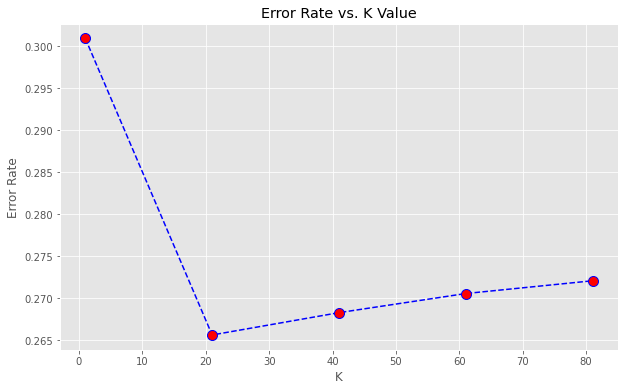

In [162]:
error_rate = []
for i in range(1,101,20):
 knn = KNeighborsClassifier(weights= "distance", p= 2, n_neighbors= i, metric= 'minkowski')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,101,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7343453510436433 at K = 1


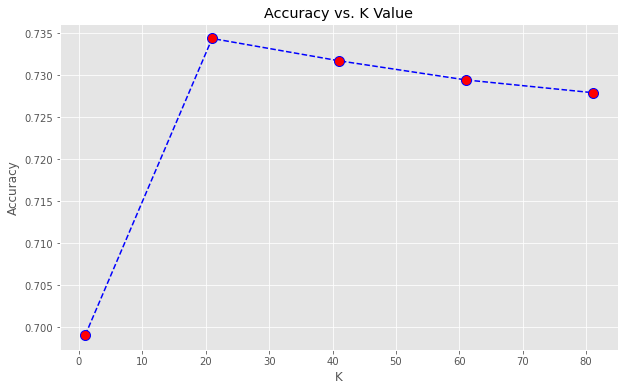

In [163]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,101,20):
    neigh = KNeighborsClassifier(weights= "distance", p= 2, n_neighbors= i, metric= 'minkowski').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,101,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [164]:
# From the Error Rate VS k graph, we can infer that the value of k would be around 21

Minimum error:- 0.2637571157495256 at K = 28


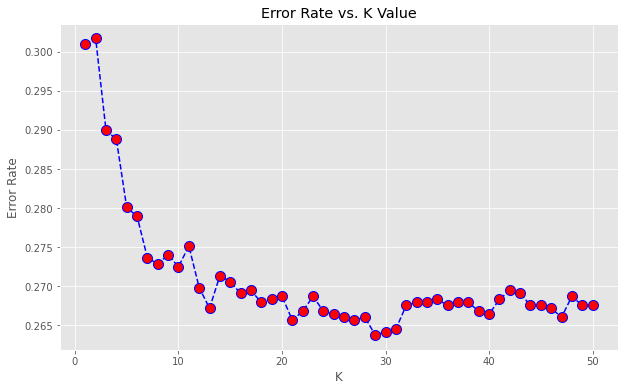

In [165]:
error_rate = []
for i in range(1,51):
 knn = KNeighborsClassifier(weights= "distance", p= 2, n_neighbors= i, metric= 'minkowski')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7362428842504743 at K = 28


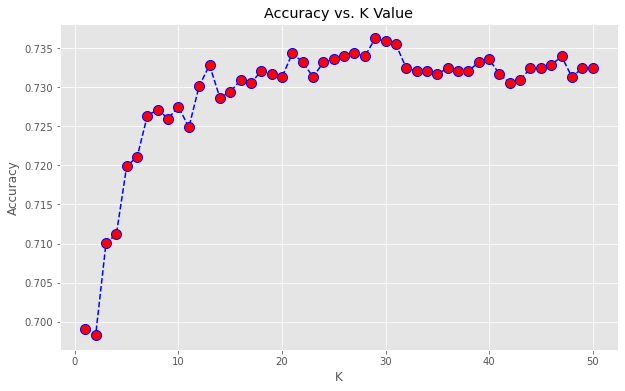

In [166]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,51):
    neigh = KNeighborsClassifier(weights= "distance", p= 2, n_neighbors= i, metric= 'minkowski').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,51),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [167]:
# K=21
#Train Accuracy of model at K=21 is: 0.998861233121848
#Test Accuracy of model at K=21 is: 0.7343453510436433

# K=28
#Train Accuracy of model at K=28 is: 0.998861233121848
#Test Accuracy of model at K=28 is: 0.7358633776091081

### Choosing th right value of K

In [168]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=21, weights= "distance", p= 2, metric= 'minkowski')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

# 21 is better than 28 neighbors (we get a more generalized model) - GRIDSEARCH CV and SCREE PLOT
# when we tried with k=94, thumb rule we dont get constant value for metrics - THUMB RULE

[[   1    3    0    0    0    0]
 [   0 1439  112   19    0    0]
 [   0  348  411   11    0    1]
 [   0  109   76   78    0    0]
 [   0    0    0    0    3    0]
 [   0   13    7    1    0    3]]
              precision    recall  f1-score   support

        20.0       1.00      0.25      0.40         4
        30.0       0.75      0.92      0.83      1570
        45.0       0.68      0.53      0.60       771
        65.0       0.72      0.30      0.42       263
        80.0       1.00      1.00      1.00         3
       120.0       0.75      0.12      0.21        24

    accuracy                           0.73      2635
   macro avg       0.82      0.52      0.58      2635
weighted avg       0.73      0.73      0.71      2635



In [169]:
# We see that the optimal value of k is is 21, obtained form SCREE PLOT and GRIDSEARCH CV

## Data Imputation: KNN

In [170]:
from sklearn.impute import KNNImputer

In [171]:
imputer = KNNImputer(n_neighbors=21, weights= "distance")

In [172]:
df_filled_1 = imputer.fit_transform(df_new)

In [173]:
df_filled_1

array([[200. ,  50. ,   3.5, ...,   0. ,   0. ,   1. ],
       [100. ,  50. ,   3.5, ...,   0. ,   0. ,   0. ],
       [150. ,  50. ,   3.6, ...,   1. ,   0. ,   0. ],
       ...,
       [150. ,  50. ,   3. , ...,   0. ,   0. ,   0. ],
       [100. ,  99. ,   3. , ...,   0. ,   1. ,   0. ],
       [150. ,  50. ,   3.6, ...,   1. ,   0. ,   0. ]])

In [174]:
df_filled_1_df = pd.DataFrame(df_filled_1, columns=df_new.columns)
df_filled_1_df.head()

,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
df_filled_1_df.isnull().sum()

Average_Cost_₹     0
Minimum_Order_₹    0
Rating             0
Votes              0
Reviews            0
Fast Food          0
Main Course        0
Beverage           0
Desert             0
Place_Bangalore    0
Place_Delhi        0
Place_Gurgaon      0
Place_Hyderabad    0
Place_Kolkata      0
Place_Mumbai       0
Place_Noida        0
Place_Pune         0
dtype: int64

In [176]:
# There are no NaN values after KNN imputation

# Final DataFrame

In [177]:
df['Delivery_Time_mins'] = df['Delivery_Time_mins'].astype("float")
df_final = pd.concat([df_filled_1_df,df['Delivery_Time_mins']], axis=1)
df_final.head()

,Average_Cost_₹,Minimum_Order_₹,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [178]:
df_final.rename(columns = {'Minimum_Order_₹': 'Minimum_Order', 'Average_Cost_₹': 'Average_Cost'}, inplace=True)

In [179]:
df_final.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [180]:
df_final_train = df_final[df_final['Delivery_Time_mins'].isnull()==False]
df_final_train['Delivery_Time_mins'] = df_final_train['Delivery_Time_mins'].astype("float")
df_final_test = df_final[df_final['Delivery_Time_mins'].isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
df_final_train.dtypes

Average_Cost          float64
Minimum_Order         float64
Rating                float64
Votes                 float64
Reviews               float64
Fast Food             float64
Main Course           float64
Beverage              float64
Desert                float64
Place_Bangalore       float64
Place_Delhi           float64
Place_Gurgaon         float64
Place_Hyderabad       float64
Place_Kolkata         float64
Place_Mumbai          float64
Place_Noida           float64
Place_Pune            float64
Delivery_Time_mins    float64
dtype: object

In [182]:
df_final_test.dtypes

Average_Cost          float64
Minimum_Order         float64
Rating                float64
Votes                 float64
Reviews               float64
Fast Food             float64
Main Course           float64
Beverage              float64
Desert                float64
Place_Bangalore       float64
Place_Delhi           float64
Place_Gurgaon         float64
Place_Hyderabad       float64
Place_Kolkata         float64
Place_Mumbai          float64
Place_Noida           float64
Place_Pune            float64
Delivery_Time_mins    float64
dtype: object

In [183]:
# Export the imputed data to csv files 
df_final_train.to_csv('final_train.csv', index=False, header=True)
df_final_test.to_csv('final_test.csv', index=False, header=True)

# Checking Defects in data

## Handling Missing Values

In [184]:
df_final.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [185]:
# Check the missing vales in the dataset
df_final.isnull().sum()

Average_Cost             0
Minimum_Order            0
Rating                   0
Votes                    0
Reviews                  0
Fast Food                0
Main Course              0
Beverage                 0
Desert                   0
Place_Bangalore          0
Place_Delhi              0
Place_Gurgaon            0
Place_Hyderabad          0
Place_Kolkata            0
Place_Mumbai             0
Place_Noida              0
Place_Pune               0
Delivery_Time_mins    2774
dtype: int64

In [186]:
#% of null values
df_final.isnull().sum () / df_final.shape[0]*100

Average_Cost           0.000000
Minimum_Order          0.000000
Rating                 0.000000
Votes                  0.000000
Reviews                0.000000
Fast Food              0.000000
Main Course            0.000000
Beverage               0.000000
Desert                 0.000000
Place_Bangalore        0.000000
Place_Delhi            0.000000
Place_Gurgaon          0.000000
Place_Hyderabad        0.000000
Place_Kolkata          0.000000
Place_Mumbai           0.000000
Place_Noida            0.000000
Place_Pune             0.000000
Delivery_Time_mins    20.002884
dtype: float64

In [187]:
#To find missing values
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Average_Cost        13868 non-null  float64
 1   Minimum_Order       13868 non-null  float64
 2   Rating              13868 non-null  float64
 3   Votes               13868 non-null  float64
 4   Reviews             13868 non-null  float64
 5   Fast Food           13868 non-null  float64
 6   Main Course         13868 non-null  float64
 7   Beverage            13868 non-null  float64
 8   Desert              13868 non-null  float64
 9   Place_Bangalore     13868 non-null  float64
 10  Place_Delhi         13868 non-null  float64
 11  Place_Gurgaon       13868 non-null  float64
 12  Place_Hyderabad     13868 non-null  float64
 13  Place_Kolkata       13868 non-null  float64
 14  Place_Mumbai        13868 non-null  float64
 15  Place_Noida         13868 non-null  float64
 16  Plac

In [188]:
# Select only the attributes having missing values
df_final.isnull().sum()[df_final.isnull().sum()!=0]

Delivery_Time_mins    2774
dtype: int64

In [189]:
# The null values in Delivery_Time can be ignored as we have concatenated train and test dataset 

## Outlier Detection and Analysis

-------------------- Feature Name:  Average_Cost --------------------

 Skewness for Average_Cost is 2.933282122448419
 Kurtosis for Average_Cost is 14.07526192435119


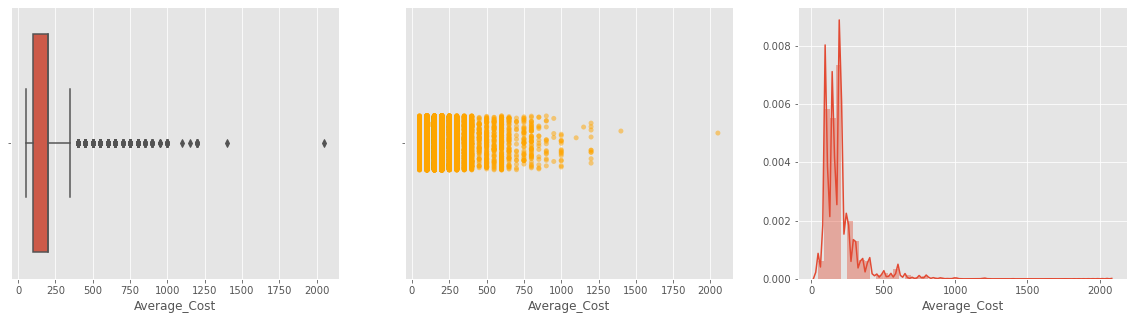



-------------------- Feature Name:  Minimum_Order --------------------

 Skewness for Minimum_Order is 7.76392494875479
 Kurtosis for Minimum_Order is 129.693899330628


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


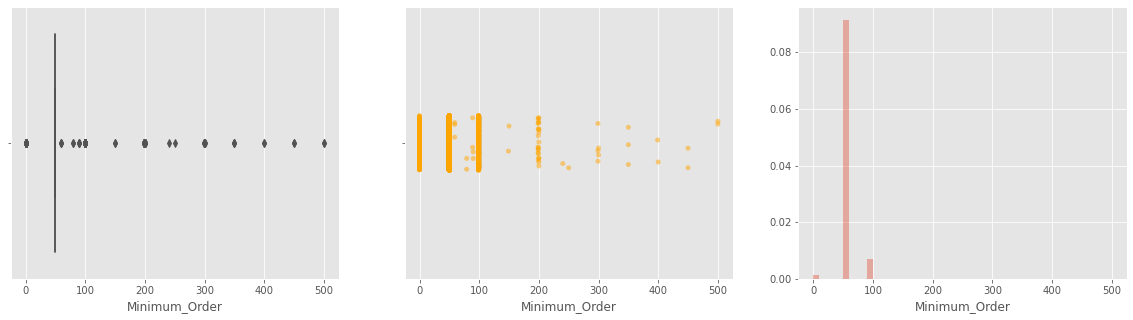



-------------------- Feature Name:  Rating --------------------

 Skewness for Rating is -0.006076071277754962
 Kurtosis for Rating is 0.289172571414968


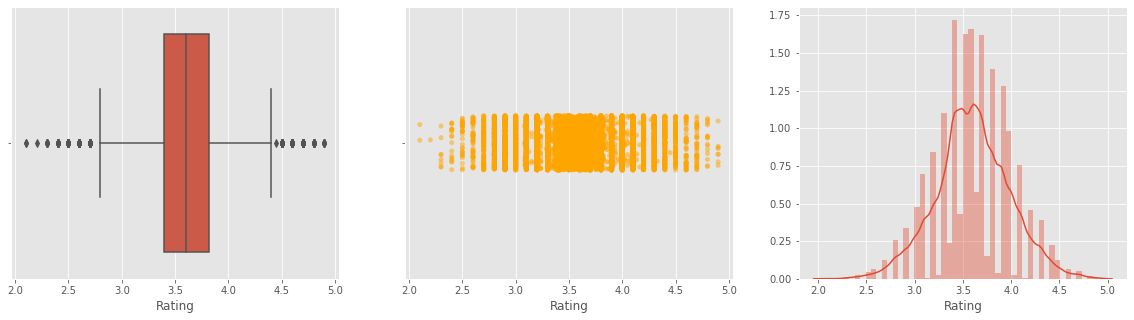



-------------------- Feature Name:  Votes --------------------

 Skewness for Votes is 6.280666615599431
 Kurtosis for Votes is 57.63150840171565


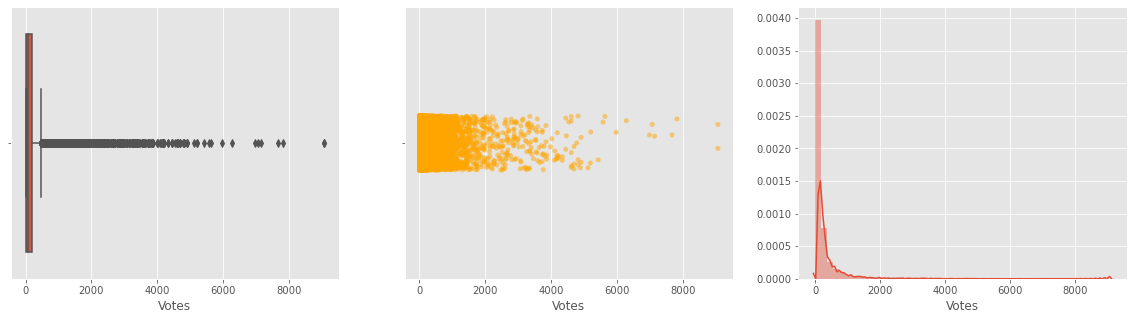



-------------------- Feature Name:  Reviews --------------------

 Skewness for Reviews is 7.602805692751819
 Kurtosis for Reviews is 91.4713146563871


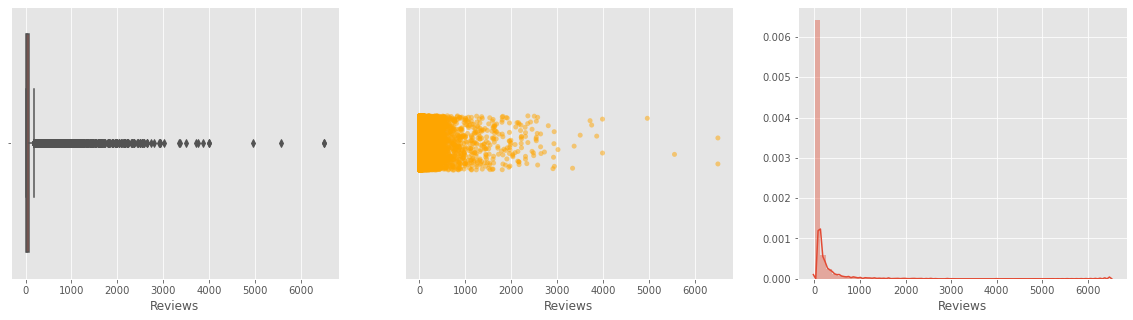



-------------------- Feature Name:  Fast Food --------------------

 Skewness for Fast Food is 0.2568053370491887
 Kurtosis for Fast Food is -1.9343300027468386


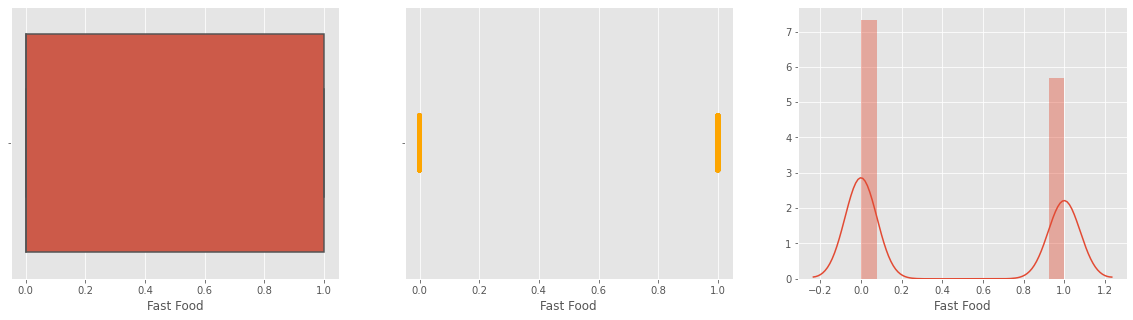



-------------------- Feature Name:  Main Course --------------------

 Skewness for Main Course is -0.8133866692363642
 Kurtosis for Main Course is -1.33859519516297


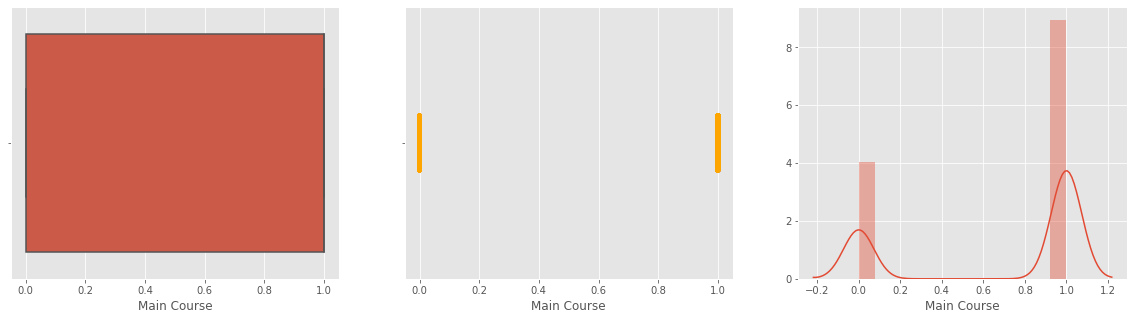



-------------------- Feature Name:  Beverage --------------------

 Skewness for Beverage is 2.0627903865296138
 Kurtosis for Beverage is 2.2554294290077905


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


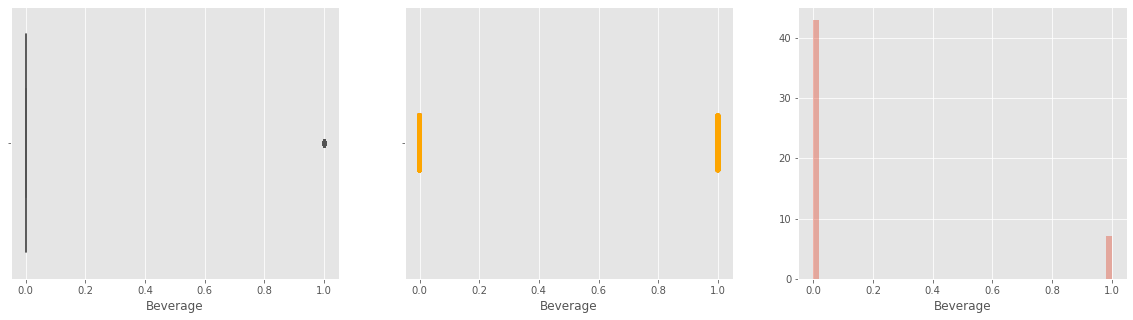



-------------------- Feature Name:  Desert --------------------

 Skewness for Desert is 1.5931419514788452
 Kurtosis for Desert is 0.5381788712522684


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


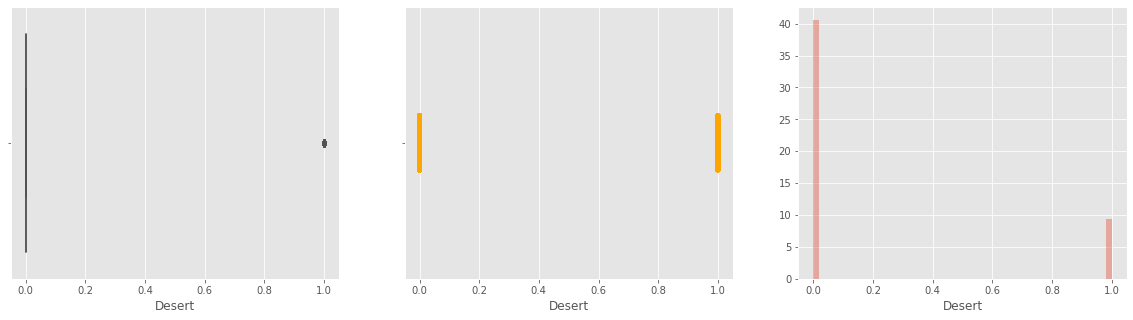



-------------------- Feature Name:  Place_Bangalore --------------------

 Skewness for Place_Bangalore is 1.584729576749932
 Kurtosis for Place_Bangalore is 0.5114415691455427


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


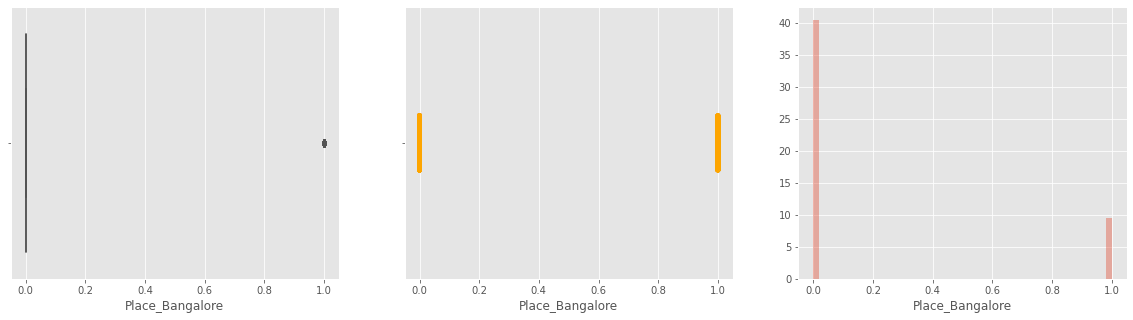



-------------------- Feature Name:  Place_Delhi --------------------

 Skewness for Place_Delhi is 1.6391123202659146
 Kurtosis for Place_Delhi is 0.6867882241186907


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


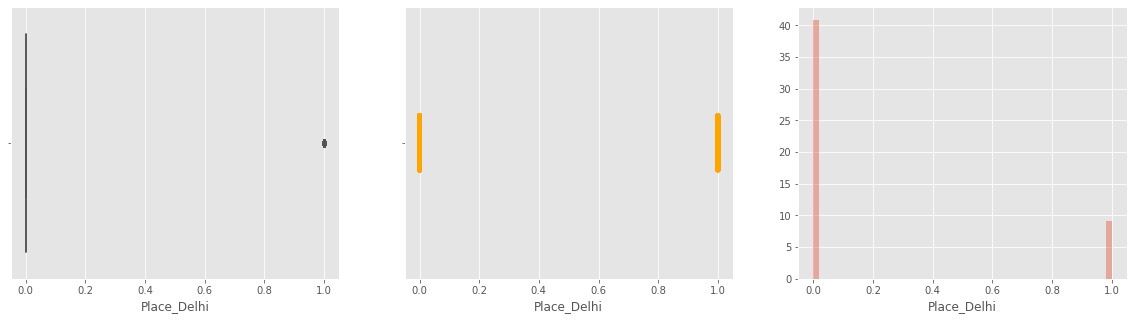



-------------------- Feature Name:  Place_Gurgaon --------------------

 Skewness for Place_Gurgaon is 3.452934642308941
 Kurtosis for Place_Gurgaon is 9.924188859046351


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


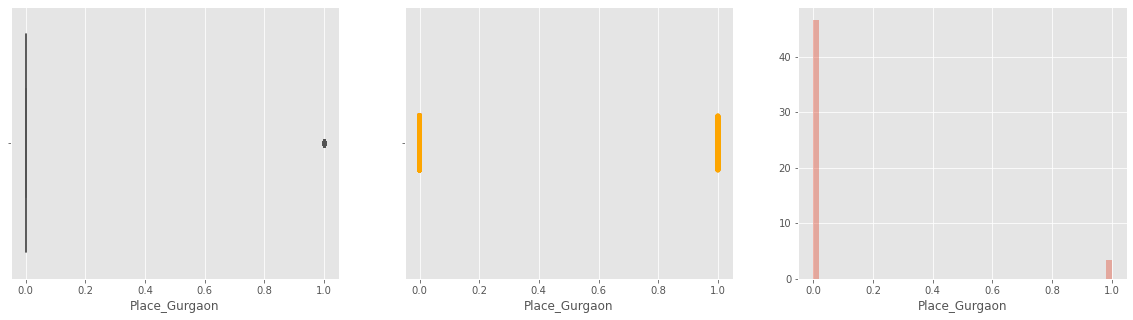



-------------------- Feature Name:  Place_Hyderabad --------------------

 Skewness for Place_Hyderabad is 5.189255506965916
 Kurtosis for Place_Hyderabad is 24.93196830704897


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


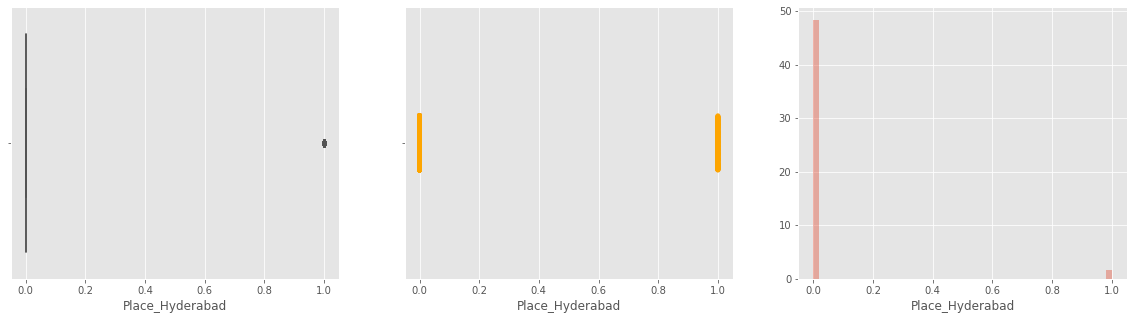



-------------------- Feature Name:  Place_Kolkata --------------------

 Skewness for Place_Kolkata is 4.184431564088903
 Kurtosis for Place_Kolkata is 15.511704543744225


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


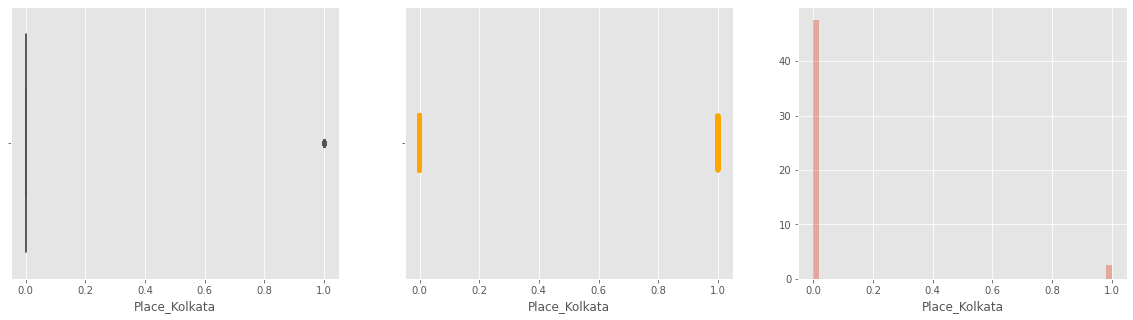



-------------------- Feature Name:  Place_Mumbai --------------------

 Skewness for Place_Mumbai is 2.4808327610506353
 Kurtosis for Place_Mumbai is 4.1551304075440365


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


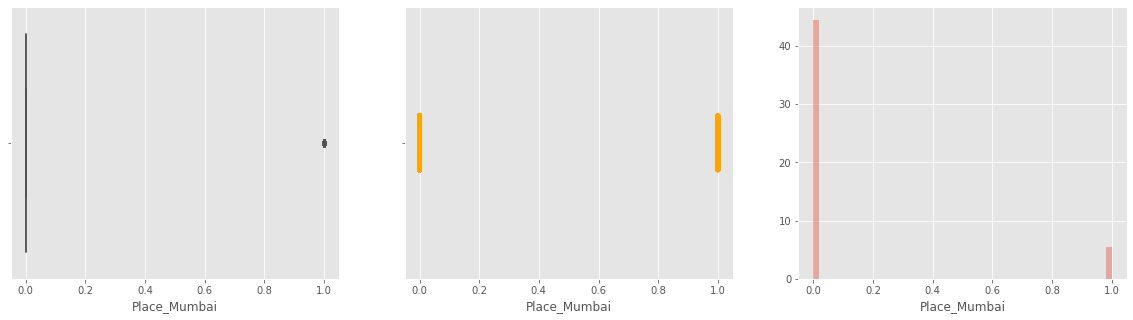



-------------------- Feature Name:  Place_Noida --------------------

 Skewness for Place_Noida is 1.5733947827336507
 Kurtosis for Place_Noida is 0.4756397168207034


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


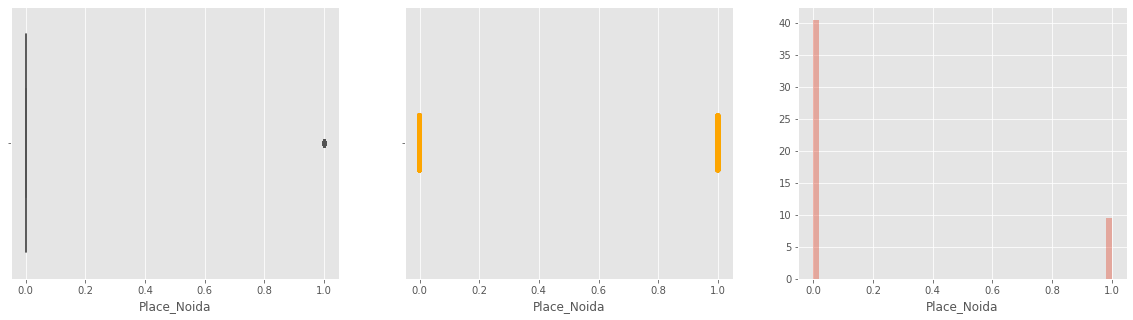



-------------------- Feature Name:  Place_Pune --------------------

 Skewness for Place_Pune is 1.7009705011803562
 Kurtosis for Place_Pune is 0.8934294727179863


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


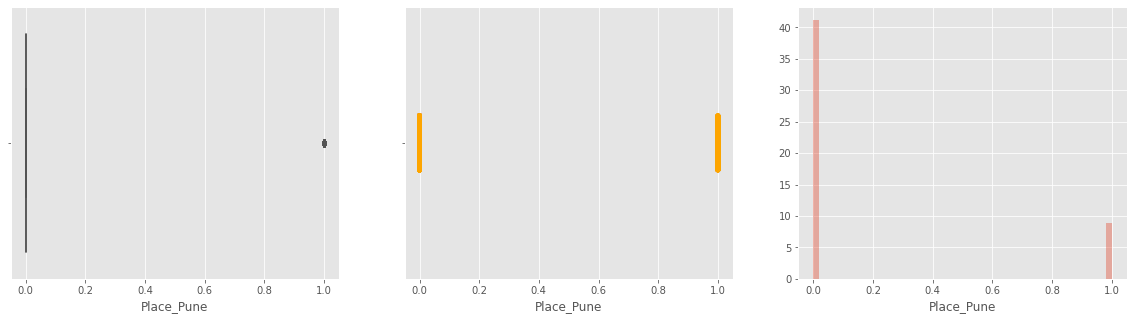



-------------------- Feature Name:  Delivery_Time_mins --------------------

 Skewness for Delivery_Time_mins is 2.5798491739187157
 Kurtosis for Delivery_Time_mins is 10.441095916939943


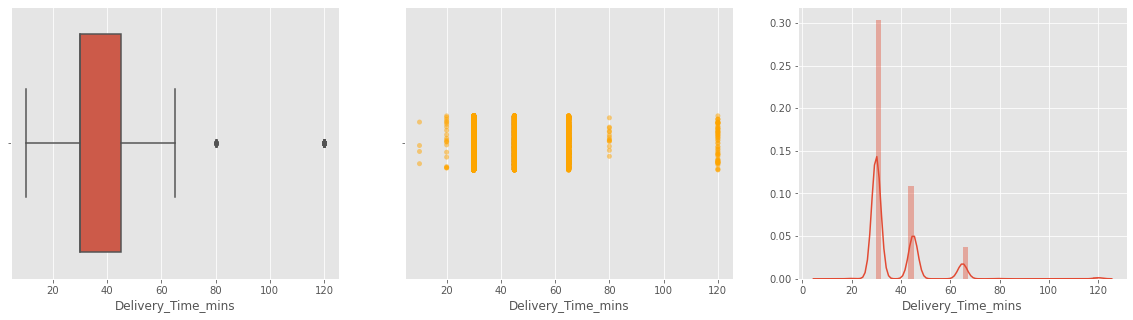

In [190]:
for i in df_final.select_dtypes(exclude="object").columns:
    fig, axes = plt.subplots(1,3, figsize=(20,5))
    print("-------------------- Feature Name: ",i,"--------------------")
    sns.boxplot(df_final[i], ax=axes[0])
    sns.stripplot(df_final[i], jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    sns.distplot(df_final[i])
    print ( "\n Skewness for" , i , "is" , df_final[ i ].skew())
    print ( " Kurtosis for" , i , "is" , df_final[ i ].kurt())
    plt.show()
    print("\n")

In [191]:
# All continuous numeric columns have outliers.

## Distribution of the Target

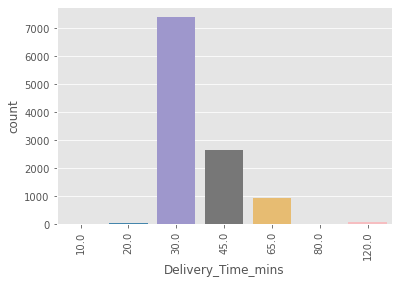

30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time_mins, dtype: int64




In [192]:
sns.countplot(df_final['Delivery_Time_mins'])
plt.xticks(rotation="90")
plt.show()
print(df_final['Delivery_Time_mins'].value_counts()) 
d = df_final['Delivery_Time_mins'].value_counts()

print("\n")
#j=0
#for i in d.index:
#        print ('Selector',"\t", round(((d[j]/df_final.shape[0])*100),2),"%")
#        j += 1

In [193]:
# The target variable is not evenly distributed and therefore, we need to balance it. 
# In classification we can balance the data using SMOTE or NearMiss.
# According to it if the minority class is less than 20% of the majority class, we need to balance the data.
# But the minority class in this case is below 20% of the majority class. 
# Hence, we need to use Balancing methods.

In [194]:
# We see that the Numeric variables seem to have outlies, but we won't do anything with them as they would be necessary to analyze the data.